In [1]:
import xai

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 11.5
plt.rcParams['figure.figsize'] = (14,4)

## Data Loading

In [351]:
starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/select_feature_df_200720.xlsx')
starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/select_feature_df_vif_delete_200720.xlsx')
# starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/all_feature_200720.xlsx')

In [499]:
starbucks_feature_drop_smallreview

,대기업점수13,교통량_점수_주말_역수,대기업점수15,맥도날드_거리,대기업개수,대기업점수16,대기업점수7_log,score_A2,대기업점수2,아파트_점수2,...,최근접_대기업_자본금4,최근접_대기업_자본금,교통량_점수_점심,교통량_점수,교통량_점수_점심_sqrt,아파트_점수3,대기업점수14_log,교통량_점수_역수,교통량_점수_주말,관광지_점수_log
0,0.613808,0.600000,2.544297,1.197120,33,0.092030,3.405567,0.680499,0.094838,0.937790,...,179696.460733,32290818000,0.0,0.666667,0.707107,0.989247,6.651312,0.545455,0.666667,8.735895
1,0.340383,0.272727,1.346494,1.431670,29,0.055171,2.699479,0.482700,0.074608,1.553278,...,244948.974278,60000000000,1.5,2.333333,1.224745,1.167943,4.081998,0.300000,2.666667,3.542321
2,0.140774,0.375000,0.883983,5.423097,14,0.012412,3.921176,0.432452,0.022035,9.193436,...,116698.811048,13618612500,1.5,2.666667,1.224745,3.239376,5.638282,0.272727,1.666667,6.958720
3,0.333853,0.375000,0.644728,0.076778,3,0.092030,0.464231,0.380050,0.011950,3.258032,...,363020.371329,68786482000,2.0,2.833333,1.414214,1.456235,1.058707,0.260870,1.666667,8.313377
4,0.000065,0.375000,0.000777,3.097773,1,0.000003,4.873944,0.505294,0.000009,0.084917,...,36517.942165,1333560100,2.5,1.166667,1.581139,0.478505,6.093768,0.461538,1.666667,8.273091
5,0.141698,0.272727,1.364268,1.419503,16,0.007436,5.467090,0.563726,0.008881,0.221745,...,54772.255751,3000000000,3.0,1.333333,1.732051,0.287319,8.211889,0.428571,2.666667,10.482628
6,0.000000,0.600000,0.000000,1.330699,0,0.000000,0.000000,0.387270,0.000000,0.259955,...,363020.371329,68786482000,0.0,1.500000,0.707107,0.446267,0.000000,0.400000,0.000000,11.849850
7,0.068305,0.375000,0.175018,0.939125,1,0.019830,0.549716,0.257775,0.003443,0.259958,...,363020.371329,68786482000,2.0,1.833333,1.414214,0.446272,0.902876,0.352941,1.666667,9.517529
8,0.000000,0.333333,0.000000,0.162548,0,0.000000,0.000000,0.753784,0.000000,3.111863,...,363020.371329,68786482000,3.0,2.333333,1.732051,1.442935,0.000000,0.300000,2.000000,0.000000
9,0.000000,0.600000,0.000000,5.423097,0,0.000000,0.000000,0.425602,0.000000,0.000000,...,132137.068985,17460205000,1.0,1.000000,1.000000,0.868288,0.000000,0.500000,0.666667,10.208190


In [493]:
ss =  pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710.xlsx')

In [498]:
ss[['지점명', '3개월 영수증 개수']].sort_values('3개월 영수증 개수', ascending=False).to_excel('영수증개수_list.xlsx',index=False)
ss[['지점명', '3개월 영수증 개수']].sort_values('3개월 영수증 개수', ascending=False)

,지점명,3개월 영수증 개수
101,스타벅스 리버사이드팔당DTR점,164
158,스타벅스 영등포신길DT점,157
105,스타벅스 명지강변DT점,145
211,스타벅스 제주성산DT점,144
179,스타벅스 을숙도강변DT점,129
177,스타벅스 원주명륜DT점,128
220,스타벅스 창원역DT점,126
156,스타벅스 역곡역DT점,125
233,스타벅스 춘천석사DT점,123
14,스타벅스 공릉DT점,120


In [353]:
starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.sort_values('지점명').reset_index(drop=True)
# ss = ss.sort_values('지점명').reset_index(drop=True)
# starbucks_feature_drop_smallreview['영수증개수'] = ss['3개월 영수증 개수']

In [355]:
starbucks_feature_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx')
# starbucks_feature_smallreview = starbucks_feature_smallreview.drop(['리뷰 점수', '3개월 영수증 개수'], axis=1)

In [356]:
starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.drop(['class10', 'class5', 'class3'], axis=1)

In [357]:
starbucks_feature_drop_smallreview.describe()

,대기업점수13,교통량_점수_주말_역수,대기업점수15,맥도날드_거리,대기업개수,대기업점수16,대기업점수7_log,score_A2,대기업점수2,아파트_점수2,...,최근접_대기업_자본금4,최근접_대기업_자본금,교통량_점수_점심,교통량_점수,교통량_점수_점심_sqrt,아파트_점수3,대기업점수14_log,교통량_점수_역수,교통량_점수_주말,관광지_점수_log
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.188690,0.377130,0.826197,1.788336,10.338028,0.026577,2.792987,0.434235,0.026249,2.999233,...,179613.900813,2.999088e+10,1.981221,1.834116,1.386151,1.393895,4.103692,0.365853,1.791862,6.573595
std,0.206347,0.104696,0.790859,1.552995,9.372194,0.032630,1.464155,0.139008,0.042397,3.179938,...,99061.052742,2.334784e+10,0.864458,0.629777,0.308976,0.894930,1.990433,0.083977,0.757199,4.260918
min,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072656,0.000000,0.000000,...,36275.156788,1.315887e+09,0.000000,0.333333,0.707107,0.036444,0.000000,0.200000,0.000000,0.000000
25%,0.039919,0.300000,0.234553,0.592388,2.000000,0.003414,1.863668,0.344196,0.003424,0.749017,...,109544.511501,1.200000e+10,1.500000,1.500000,1.224745,0.768650,3.185507,0.300000,1.333333,0.000000
50%,0.099845,0.333333,0.552146,1.277199,8.000000,0.009893,3.131658,0.423641,0.014825,1.584900,...,137838.996659,1.899959e+10,2.000000,2.000000,1.414214,1.167943,4.554908,0.333333,2.000000,8.062457
75%,0.284379,0.428571,1.240793,2.585736,16.000000,0.041705,3.895857,0.526522,0.029893,4.127161,...,213178.258741,4.544497e+10,2.500000,2.333333,1.581139,1.801783,5.361760,0.400000,2.333333,9.517529
max,0.613808,0.600000,2.544297,5.423097,33.000000,0.092030,6.376343,0.760444,0.306430,9.193436,...,363020.371329,6.878648e+10,4.000000,3.000000,2.000000,3.292118,8.211889,0.545455,3.666667,22.073933


In [358]:
starbucks_feature_drop_smallreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 26 columns):
대기업점수13           213 non-null float64
교통량_점수_주말_역수      213 non-null float64
대기업점수15           213 non-null float64
맥도날드_거리           213 non-null float64
대기업개수             213 non-null int64
대기업점수16           213 non-null float64
대기업점수7_log        213 non-null float64
score_A2          213 non-null float64
대기업점수2            213 non-null float64
아파트_점수2           213 non-null float64
맥도날드_거리_log       213 non-null float64
대기업점수10_log       213 non-null float64
최근접_대기업_자본금3      213 non-null float64
대기업점수1_log        213 non-null float64
대기업점수4            213 non-null float64
지점명               213 non-null object
최근접_대기업_자본금4      213 non-null float64
최근접_대기업_자본금       213 non-null int64
교통량_점수_점심         213 non-null float64
교통량_점수            213 non-null float64
교통량_점수_점심_sqrt    213 non-null float64
아파트_점수3           213 non-null float64
대기업점수14_log       213 non-null float64
교통량

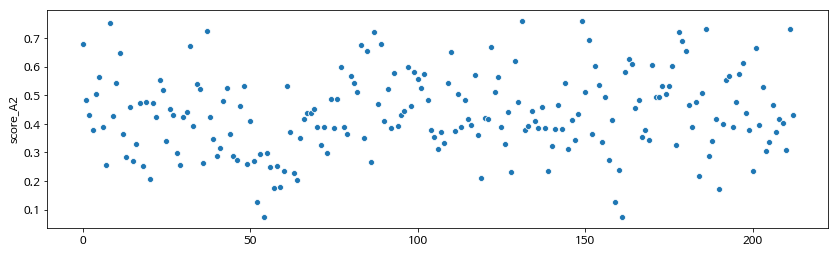

In [359]:
sns.scatterplot(starbucks_feature_drop_smallreview['score_A2'].index, starbucks_feature_drop_smallreview['score_A2'])

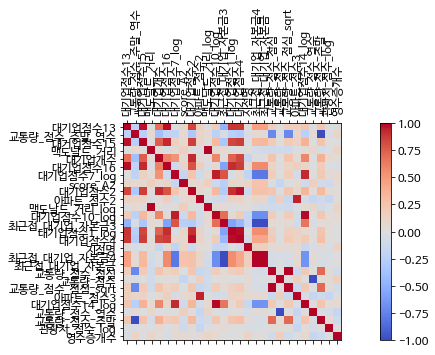

In [292]:
_ = xai.correlations(starbucks_feature_drop_smallreview, include_categorical=True, plot_type="matrix")

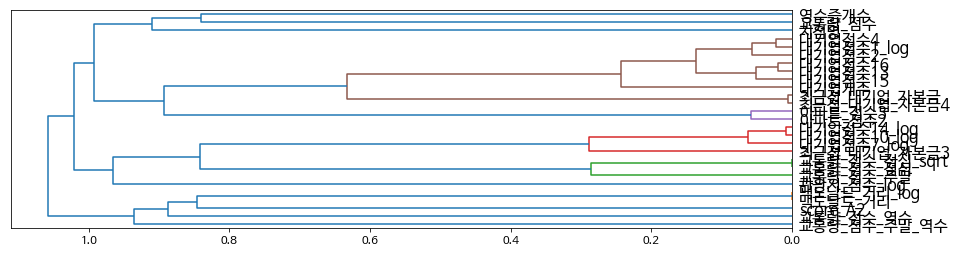

In [293]:
_ = xai.correlations(starbucks_feature_drop_smallreview, include_categorical=True)

In [294]:
# starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.fillna(starbucks_feature_drop_smallreview.mean())
# starbucks_feature_drop_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_scoreA2_before_norm.xlsx', index=False)

In [295]:
# starbucks_feature_smallreview = starbucks_feature_smallreview.fillna(starbucks_feature_smallreview.mean())
# starbucks_feature_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx', index=False)

## 예측 결과 가시화용 함수 만들기

In [296]:
def reset_param():
    mpl.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'NanumBarunGothic'
    plt.rcParams['font.size'] = 11.5
    plt.rcParams['figure.figsize'] = (14,4)

def visualize_result(y_test, y_pred, title='test data', model_title='linearmodel'):
    plt.plot(y_test, color = 'red', label = 'Real data')
    plt.plot(y_pred, color = 'blue', label = 'Predicted data')
    plt.title(f'{model_title} Prediction {title}')
    plt.legend()
    plt.show()
    visualize_linear(y_test, y_pred)
    reset_param()
    
def visualize_linear(y_test, y_pred):
    plt.figure(figsize=(14,14))
    plt.scatter(y_test, y_pred, color = 'blue')
    x_len = len(y_test)
    x = np.linspace(0,1,x_len)
    plt.plot(x, x, color = 'red', label = 'ideal')
    plt.xlabel("DT Index : $Y_i$")
    plt.ylabel("Predicted DT Index: $\hat{Y}_i$")
    plt.title("DT Index vs Predicted DT Index: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

## 학습/검증용 데이터 프레임 준비

In [298]:
# starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.drop(['class3', 'class5', 'class10'], axis=1)

In [363]:
target_label = 'score_A2'

In [371]:
df = starbucks_feature_drop_smallreview.copy()
# df = df.drop(target_label, axis=1)
feature_names = df.drop(['지점명', target_label], axis=1).columns
feature_names.values

array(['대기업점수13', '교통량_점수_주말_역수', '대기업점수15', '맥도날드_거리', '대기업개수',
       '대기업점수16', '대기업점수7_log', '대기업점수2', '아파트_점수2', '맥도날드_거리_log',
       '대기업점수10_log', '최근접_대기업_자본금3', '대기업점수1_log', '대기업점수4',
       '최근접_대기업_자본금4', '최근접_대기업_자본금', '교통량_점수_점심', '교통량_점수',
       '교통량_점수_점심_sqrt', '아파트_점수3', '대기업점수14_log', '교통량_점수_역수',
       '교통량_점수_주말', '관광지_점수_log'], dtype=object)

In [367]:
# df = df.rename(columns={x:'_'.join(x.split(' ')) for x in feature_names.values})
# df = df.rename(columns={'5km내_대기업_개수':'대기업개수'})
# feature_names = df.drop(['지점명', 'score_A2','score_A2.1'], axis=1).columns
# feature_names = df.drop(['지점명', 'score_A2','영수증개수'], axis=1).columns
feature_names

Index(['대기업점수13', '교통량_점수_주말_역수', '대기업점수15', '맥도날드_거리', '대기업개수', '대기업점수16',
       '대기업점수7_log', '대기업점수2', '아파트_점수2', '맥도날드_거리_log', '대기업점수10_log',
       '최근접_대기업_자본금3', '대기업점수1_log', '대기업점수4', '최근접_대기업_자본금4', '최근접_대기업_자본금',
       '교통량_점수_점심', '교통량_점수', '교통량_점수_점심_sqrt', '아파트_점수3', '대기업점수14_log',
       '교통량_점수_역수', '교통량_점수_주말', '관광지_점수_log'],
      dtype='object')

## Train test split

In [372]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)
df_train.shape, df_test.shape

((191, 26), (22, 26))

## minmax normalization OR standard normalization

In [373]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def normalization_train_test(df_train, df_test, method='standard', except_cols=['지점명']):
    if method=='standard':
        sc = StandardScaler()
    elif method=='minmax':
        sc = MinMaxScaler()

    df_train_sc = sc.fit_transform(df_train.drop(except_cols, axis=1))
    df_test_sc = sc.transform(df_test.drop(except_cols, axis=1))

    df_train_sc = pd.DataFrame(df_train_sc, columns=df_train.drop(except_cols, axis=1).columns, index=list(df_train.index.values))
    df_test_sc = pd.DataFrame(df_test_sc, columns=df_test.drop(except_cols, axis=1).columns, index=list(df_test.index.values))

    df_train_sc[except_cols] = df_train[except_cols]
    df_test_sc[except_cols] = df_test[except_cols]
    return df_train_sc, df_test_sc

## normalization method select

In [374]:
df_train_sc, df_test_sc = normalization_train_test(df_train, df_test, 'minmax')
x_train = df_train_sc[feature_names].reset_index(drop=True)
y_train = df_train_sc[target_label].reset_index(drop=True)
x_test = df_test_sc[feature_names].reset_index(drop=True)
y_test = df_test_sc[target_label].reset_index(drop=True)
print(f'train : {x_train.shape}, {y_train.shape} \ntest: {x_test.shape}, {y_test.shape}')

train : (191, 24), (191,) 
test: (22, 24), (22,)


In [377]:
set(df_train.columns).difference(set(x_train.columns))

{'score_A2', '지점명'}

## k fold

In [378]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score

## 회귀모델 (선형)

In [380]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [381]:
class Kfold(object):
    def __init__(self):
        self.models = {}
        self.train_scores = {}
        self.test_scores = {}
        self.train_errors = {}
        self.test_errors = {}
     
    @staticmethod
    def get_r2_score(y_true, y_pred):
        rss = ((y_true - y_pred) ** 2).sum()
        tss = ((y_true - y_true.mean())** 2).sum()
        rsquared = 1 - rss / tss
        return rsquared   
    
    @staticmethod
    def get_cross_val_score(model, df, train_features, label_feature, k, normalization, task):
        models = []
        train_scores = np.zeros(k)
        train_errors = []
        test_scores = np.zeros(k)
        test_errors = []
        cv = KFold(k, shuffle=True, random_state=0)
        for i, (idx_train, idx_test) in enumerate(cv.split(df)):
            df_train = df.iloc[idx_train]
            df_test = df.iloc[idx_test]
            df_train, df_test = normalization_train_test(df_train, df_test, normalization, except_cols=['지점명', label_feature])
            if model is None:
                model = sm.OLS.from_formula("score_A2 ~ " + " + ".join(feature_names2), data=df_train)
                result = model.fit()
                pred = result.predict(df_test)
                models.append(model)
            else:
                model.fit(df_train[train_features], df_train[label_feature])
                models.append(model)

            if task=='regression':
                train_score = Kfold.get_r2_score(df_train[label_feature], model.predict(df_train[train_features]))
                test_score = Kfold.get_r2_score(df_test[label_feature], model.predict(df_test[train_features]))
                train_error = mean_squared_error(df_train[label_feature], model.predict(df_train[train_features]))
                test_error = mean_squared_error(df_test[label_feature], model.predict(df_test[train_features]))
            elif task=='classification':
                train_score = accuracy_score(df_train[label_feature], model.predict(df_train[train_features]))
                test_score = accuracy_score(df_test[label_feature], model.predict(df_test[train_features]))
                train_error = mean_squared_error(df_train[label_feature], model.predict(df_train[train_features]))
                test_error = mean_squared_error(df_test[label_feature], model.predict(df_test[train_features]))
                
            train_scores[i] = train_score
            test_scores[i] = test_score
            train_errors.append(train_error)
            test_errors.append(test_error)
#             print("학습 score = {:.8f}, 검증 score = {:.8f}".format(train_score, test_score))
        print("학습 평균 score = {:.8f}, 검증 평균 score = {:.8f}".format(np.mean(train_scores), np.mean(test_scores)))
        return train_scores, test_scores, models, train_errors, test_errors
    
    def cross_val(self, model_name, model, df, train_features, label_feature, k=5, normalization='minmax', task='classification'):
        values = Kfold.get_cross_val_score(model, df, train_features, label_feature, k, normalization, task)
        self.models[model_name] = values[2]
        self.train_scores[model_name] = values[0]
        self.test_scores[model_name] = values[1]
        self.train_errors[model_name] = values[3]
        self.test_errors[model_name] = values[4]
        print(f'{"*"*15} {label_feature} complete {"*"*15}\n')
        
kfold3 = Kfold()
kfold5 = Kfold()
kfold10 = Kfold()

## k fold using sklearn cross_val_score

In [382]:
class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)
    
model = StatsmodelsOLS(f"{target_label} ~ " + "+".join(feature_names))
model.fit(x_train, y_train)
print(model.model)

In [383]:
print(model.result.summary())

                            OLS Regression Results                            
Dep. Variable:               score_A2   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1.990
Date:                Mon, 20 Jul 2020   Prob (F-statistic):            0.00637
Time:                        10:32:55   Log-Likelihood:                 60.746
No. Observations:                 191   AIC:                            -71.49
Df Residuals:                     166   BIC:                             9.816
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2548      0.462      0.

In [384]:
linear_model = LinearRegression()

In [385]:
feature_names

Index(['대기업점수13', '교통량_점수_주말_역수', '대기업점수15', '맥도날드_거리', '대기업개수', '대기업점수16',
       '대기업점수7_log', '대기업점수2', '아파트_점수2', '맥도날드_거리_log', '대기업점수10_log',
       '최근접_대기업_자본금3', '대기업점수1_log', '대기업점수4', '최근접_대기업_자본금4', '최근접_대기업_자본금',
       '교통량_점수_점심', '교통량_점수', '교통량_점수_점심_sqrt', '아파트_점수3', '대기업점수14_log',
       '교통량_점수_역수', '교통량_점수_주말', '관광지_점수_log'],
      dtype='object')

In [386]:
a

학습 평균 score = 0.23502667, 검증 평균 score = -0.04333015
*************** score_A2 complete ***************

학습 평균 score = 0.21585582, 검증 평균 score = -0.01868193
*************** score_A2 complete ***************

학습 평균 score = 0.20714724, 검증 평균 score = -0.06272300
*************** score_A2 complete ***************



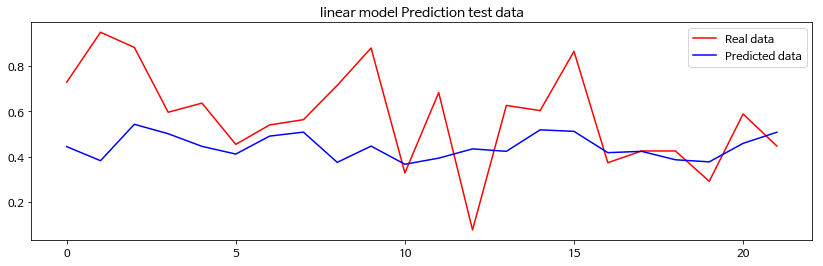

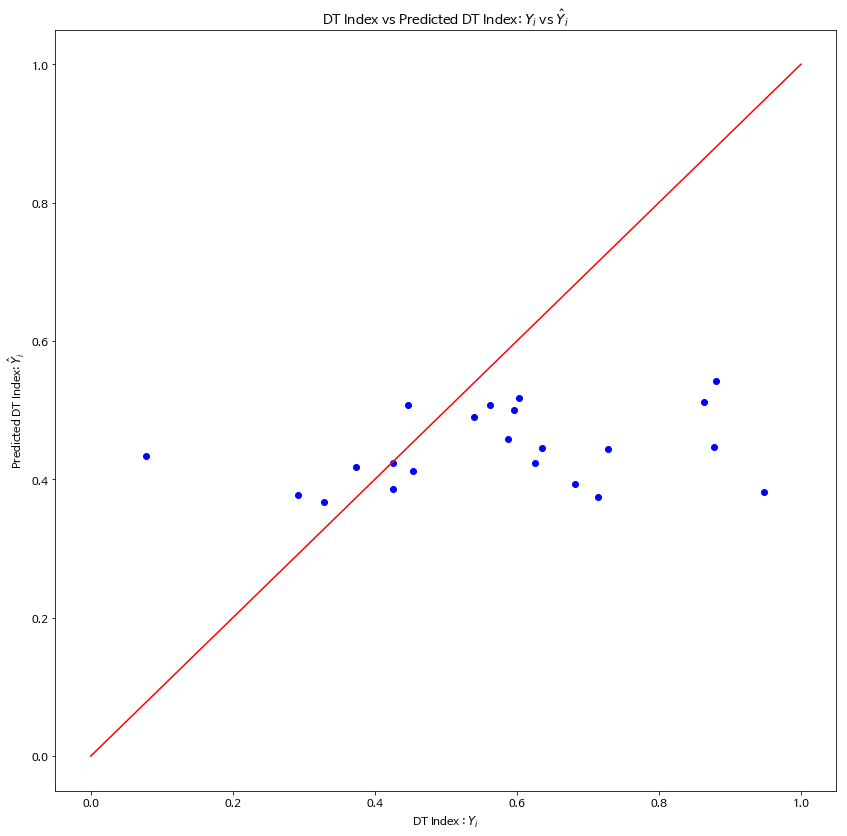

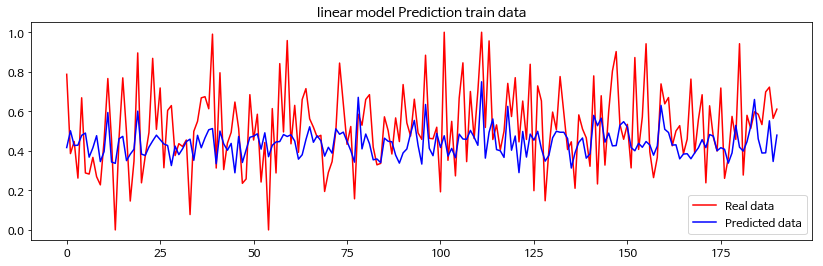

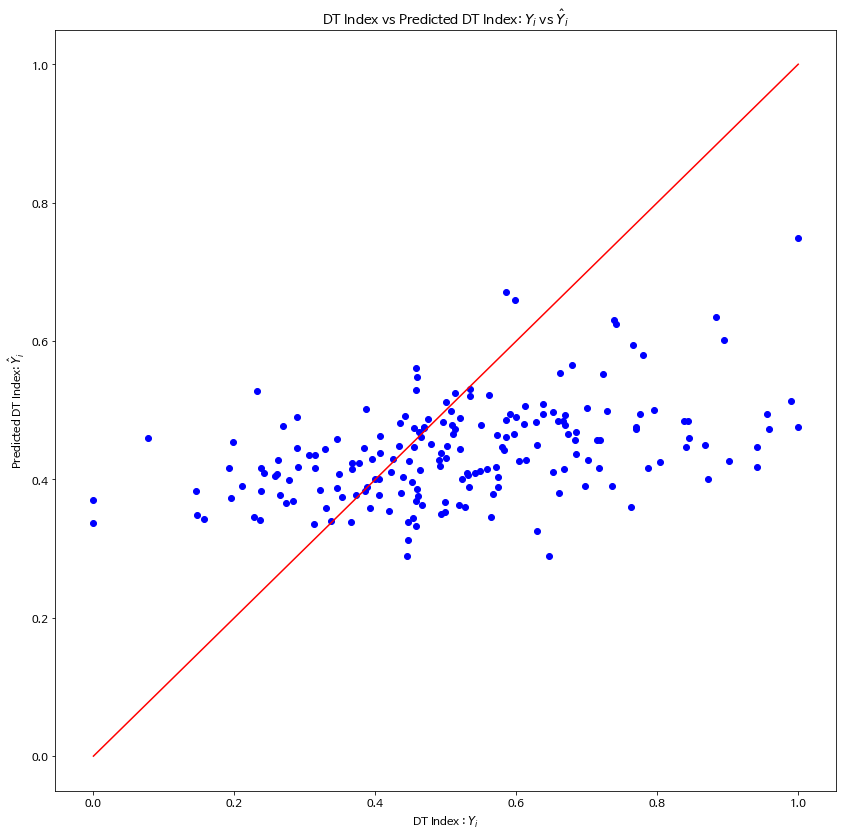

In [387]:
visualize_result(y_test, linear_model.predict(x_test), model_title='linear model')
visualize_result(y_train.values, linear_model.predict(x_train), 'train data', 'linear model')

In [388]:
def get_score(x, y, model):
    return r2_score(y, model.predict(x))

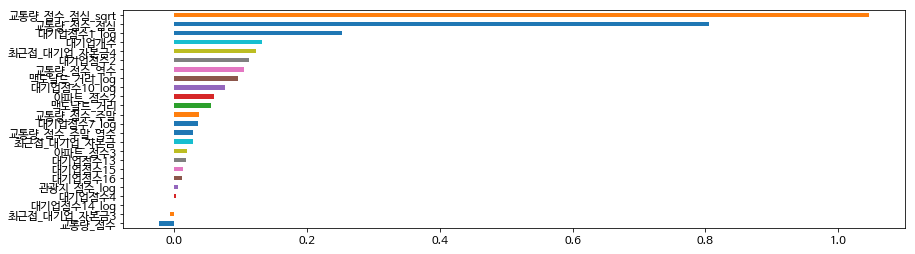

In [389]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,linear_model))

## DecisionTree Regressor

In [390]:
from sklearn.tree import DecisionTreeRegressor

In [391]:
cv = KFold(5, shuffle=True, random_state=0)

In [392]:
[(len(x),len(y)) for (x,y) in cv.split(df)]

[(170, 43), (170, 43), (170, 43), (171, 42), (171, 42)]

In [397]:
decison_tree_regressor = DecisionTreeRegressor(max_depth=10)
decison_tree_regressor.fit(x_train, y_train)
score = decison_tree_regressor.score(x_test, y_test)

print(decison_tree_regressor.score(x_train, y_train))
print("decison_tree_regressor test score:"+str(score))

0.9533910165815866
decison_tree_regressor test score:-0.8561213793327533


In [398]:
kfold3.cross_val('decison tree', decison_tree_regressor, df=df, train_features=feature_names, label_feature=target_label, k=3, task='regression')
kfold5.cross_val('decison tree', decison_tree_regressor, df=df, train_features=feature_names, label_feature=target_label, k=5, task='regression')
kfold10.cross_val('decison tree', decison_tree_regressor, df=df, train_features=feature_names, label_feature=target_label, k=10, task='regression')


학습 평균 score = 0.99246559, 검증 평균 score = -0.86941001
*************** score_A2 complete ***************

학습 평균 score = 0.93917899, 검증 평균 score = -0.86957844
*************** score_A2 complete ***************

학습 평균 score = 0.95142107, 검증 평균 score = -0.96925742
*************** score_A2 complete ***************



In [399]:
print("decison_tree_regressor train score: ", decison_tree_regressor.score(x_train, y_train))
print("decison_tree_regressor test score:", decison_tree_regressor.score(x_test, y_test))

decison_tree_regressor train score:  0.4901903382766315
decison_tree_regressor test score: 0.5988759608569312


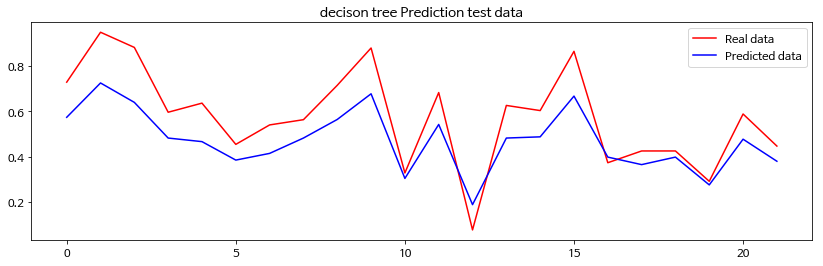

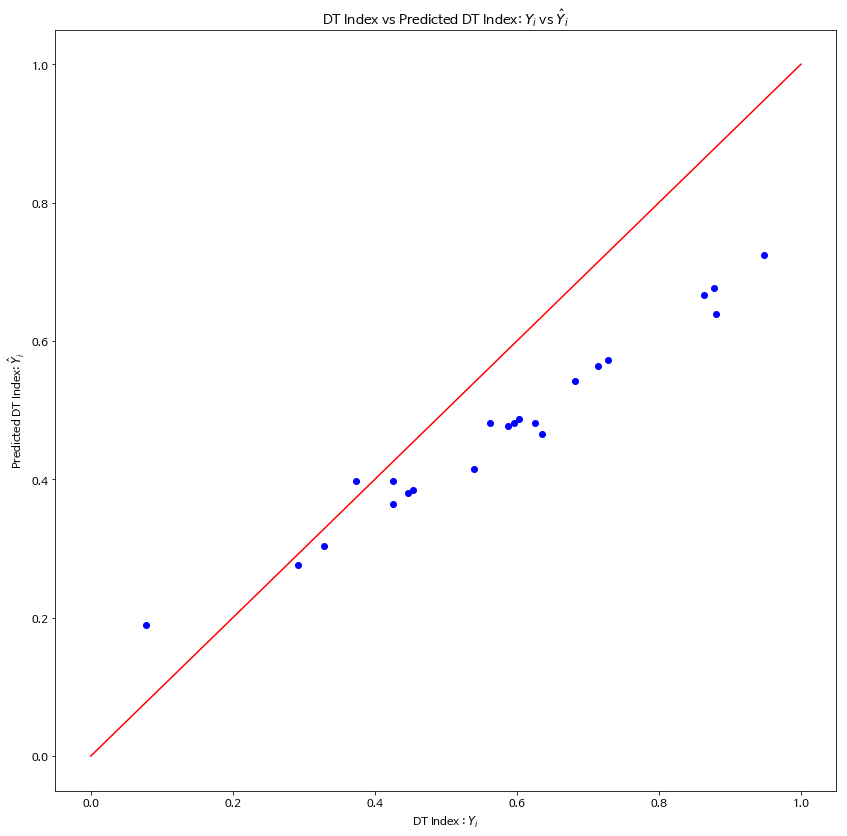

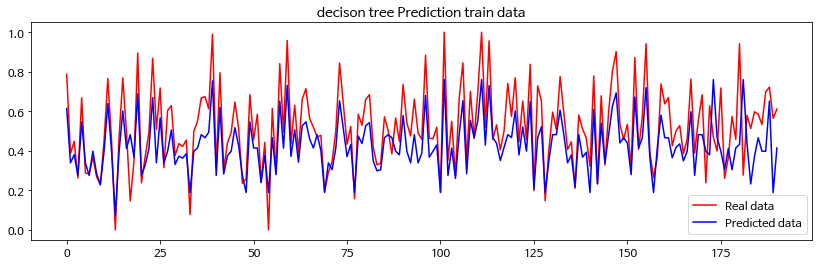

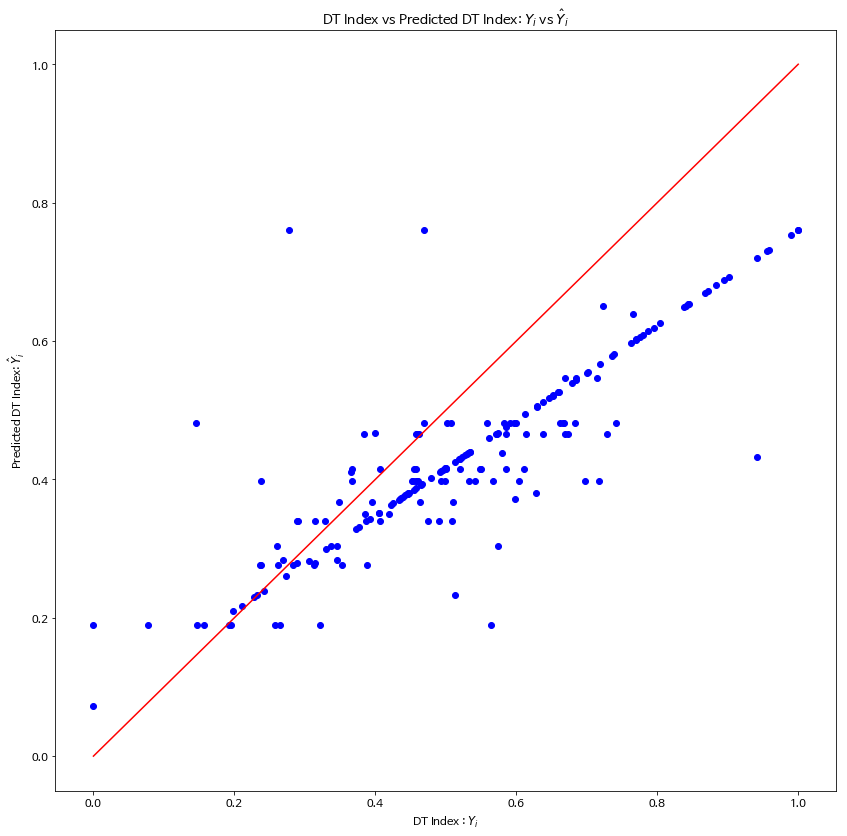

In [400]:
visualize_result(y_test.values, decison_tree_regressor.predict(x_test), 'test data', 'decison tree')
visualize_result(y_train.values, decison_tree_regressor.predict(x_train), 'train data', 'decison tree')

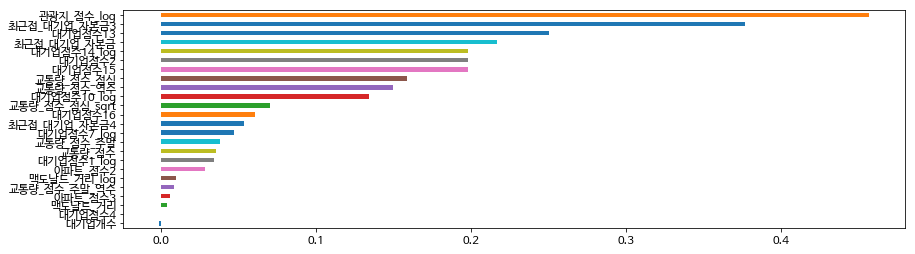

In [401]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,decison_tree_regressor))

## Random Forest

In [402]:
import pickle
from sklearn.ensemble import RandomForestRegressor

In [403]:
forest_model = RandomForestRegressor(n_estimators=40, n_jobs=-1, max_depth=37, random_state=0)

In [404]:
forest_model.fit(x_train, y_train)
print("Random forest test score:"+str(forest_model.score(x_train, y_train)))
print("Random forest test score:"+str(forest_model.score(x_test, y_test)))

Random forest test score:0.8693291311492019
Random forest test score:0.0024088094356025103


In [438]:
kfold3.cross_val('random_forest', forest_model, df=df, train_features=feature_names, label_feature='score_A2', k=3, task='regression')
kfold5.cross_val('random_forest', forest_model, df=df, train_features=feature_names, label_feature='score_A2', k=5, task='regression')
kfold10.cross_val('random_forest', forest_model, df=df, train_features=feature_names, label_feature='score_A2', k=10, task='regression')

학습 평균 score = 0.86141588, 검증 평균 score = 0.01915192
*************** score_A2 complete ***************

학습 평균 score = 0.86011539, 검증 평균 score = 0.00984918
*************** score_A2 complete ***************

학습 평균 score = 0.86560649, 검증 평균 score = 0.00622072
*************** score_A2 complete ***************



In [439]:
print("Random forest train score:"+str(forest_model.score(x_train, y_train)))
print("Random forest test score:"+str(forest_model.score(x_test, y_test)))

Random forest train score:0.43849651205698914
Random forest test score:0.35943843901525463


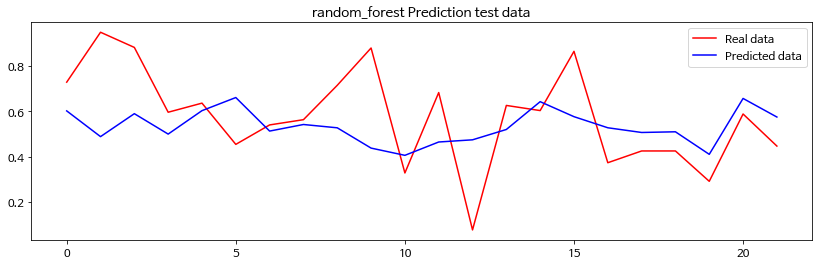

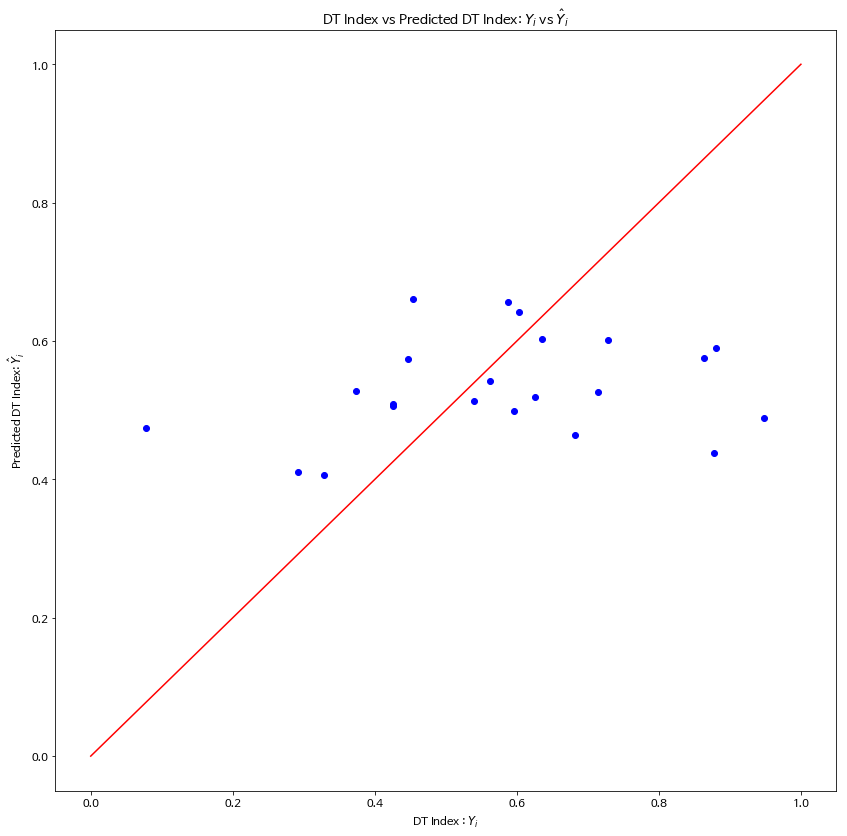

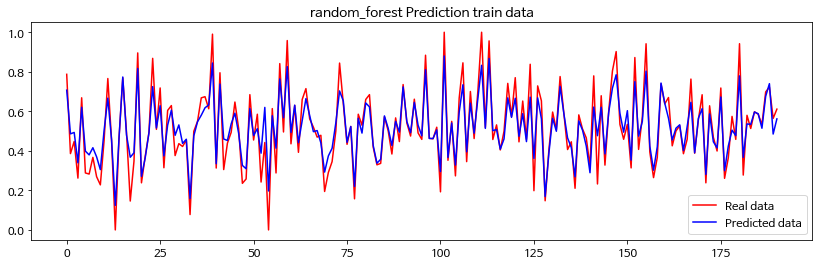

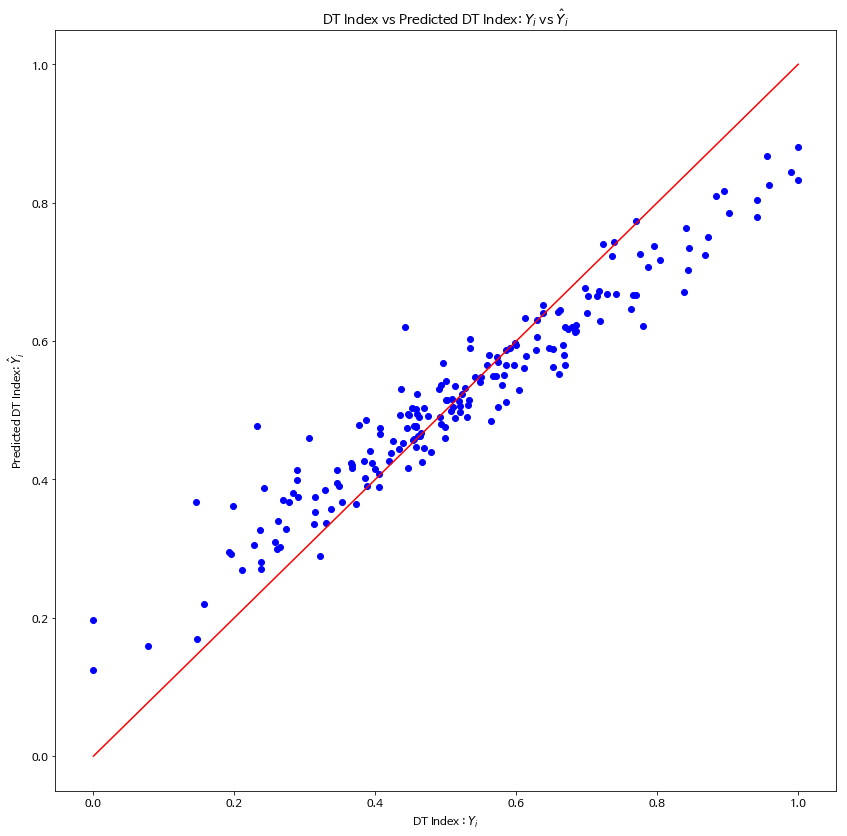

In [433]:
visualize_result(y_test.values, forest_model.predict(x_test), 'test data', 'random_forest')
visualize_result(y_train.values, forest_model.predict(x_train), 'train data', 'random_forest')

## model save

In [177]:
# tuple_objects = (forest_model, x_train, y_train, forest_model.score(x_test, y_test))

# Save tuple
# pickle.dump(tuple_objects, open("forest_model.pkl", 'wb'))

# Restore tuple
# forest_model, pickled_Xtrain, pickled_Ytrain, pickled_score = pickle.load(open("forest_model.pkl", 'rb'))

## gradient boosting

In [411]:
from sklearn import ensemble

In [412]:
params = {
    'n_estimators': 18,
    'max_depth': 3,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x_train, y_train)
print(gradient_boosting_regressor.score(x_train, y_train))
print(gradient_boosting_regressor.score(x_test, y_test))

0.9737985131448342
-0.5512017854060256


In [413]:
kfold3.cross_val('gradient_boosting', gradient_boosting_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=3, task='regression')
kfold5.cross_val('gradient_boosting', gradient_boosting_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=5, task='regression')
kfold10.cross_val('gradient_boosting', gradient_boosting_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=10, task='regression')

학습 평균 score = 0.99295482, 검증 평균 score = -0.74937623
*************** score_A2 complete ***************

학습 평균 score = 0.97983978, 검증 평균 score = -0.83561405
*************** score_A2 complete ***************

학습 평균 score = 0.97272837, 검증 평균 score = -0.59854015
*************** score_A2 complete ***************



In [415]:
print(gradient_boosting_regressor.score(x_train, y_train))
print(gradient_boosting_regressor.score(x_test, y_test))

0.5136299579139886
0.5695091135303219


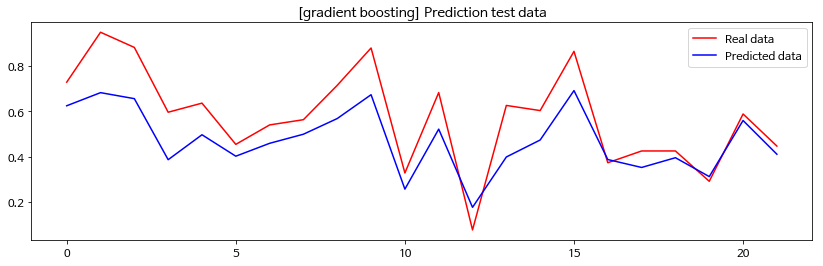

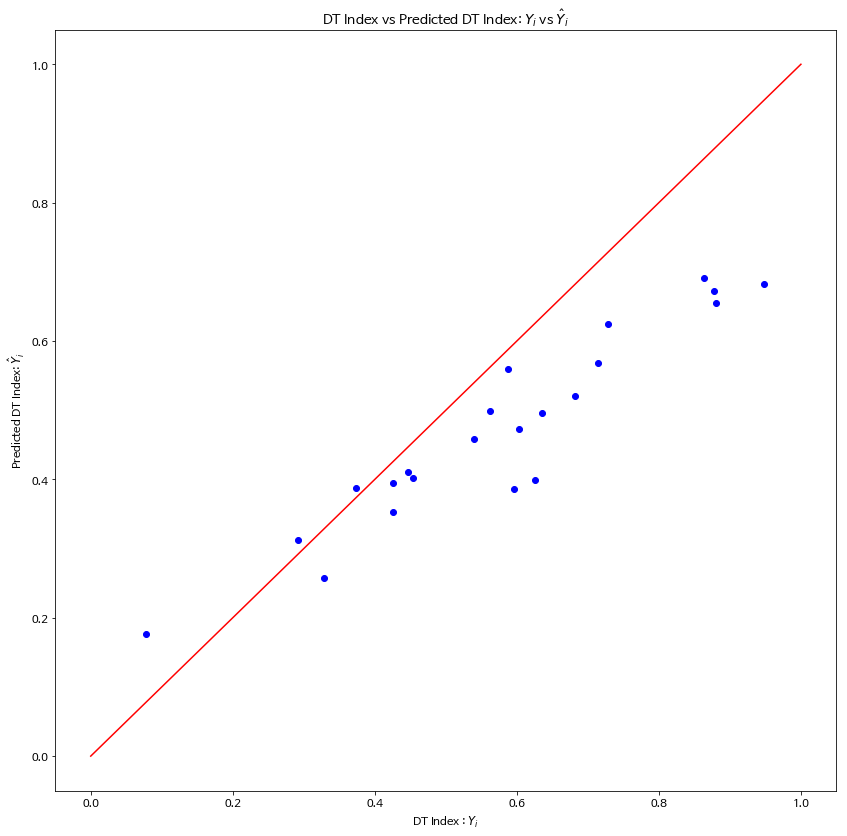

In [414]:
visualize_result(y_test.values, gradient_boosting_regressor.predict(x_test), 'test data', '[gradient boosting]')

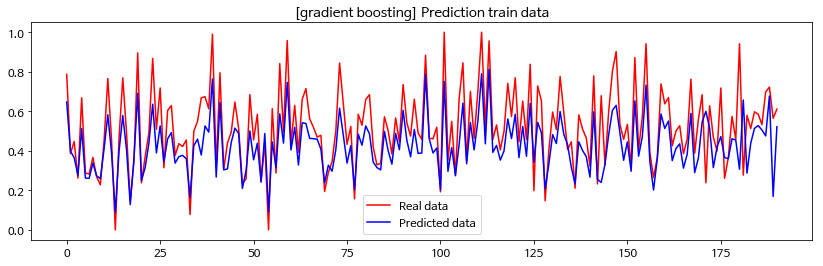

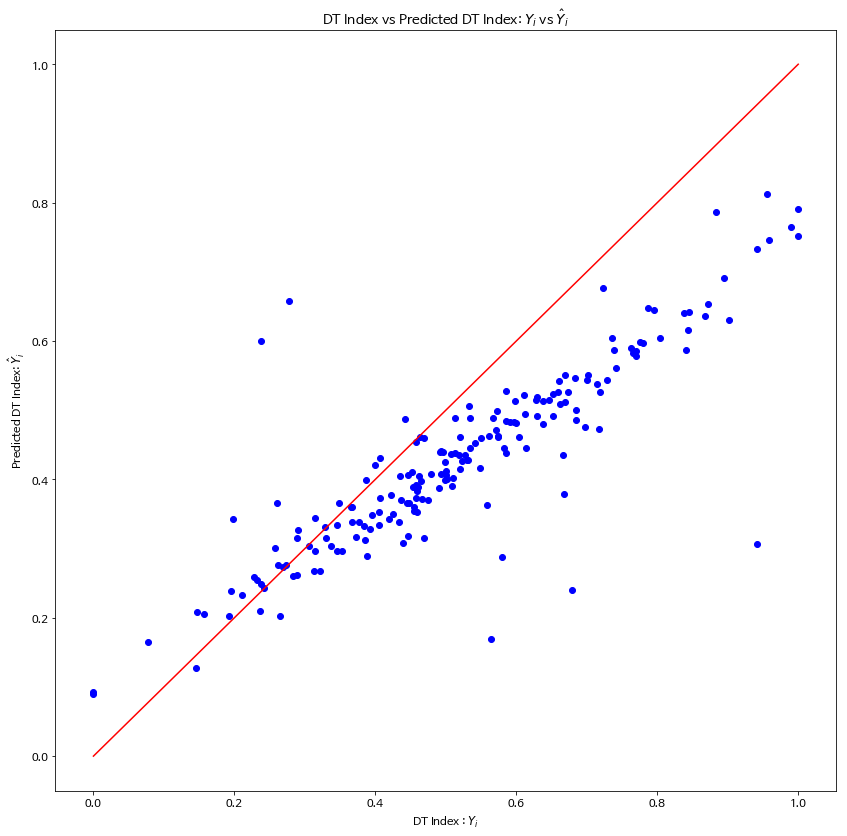

In [416]:
visualize_result(y_train.values, gradient_boosting_regressor.predict(x_train), 'train data', '[gradient boosting]')

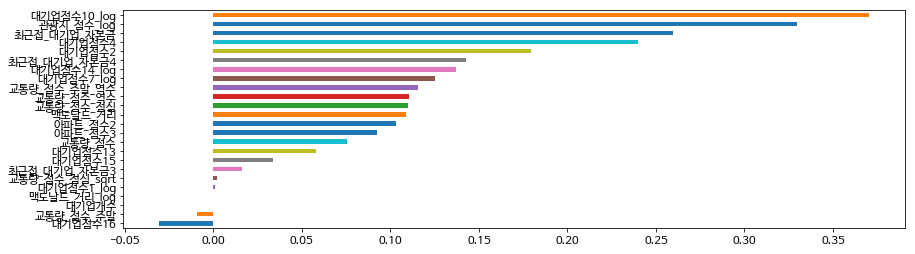

In [417]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,gradient_boosting_regressor))

## AdaBoost regression

### decisonTree ensemble

In [446]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

In [419]:
ada_boost_basic = ensemble.AdaBoostRegressor(DecisionTreeRegressor(max_depth=100))
ada_boost_basic.fit(x_train, y_train)
print(ada_boost_basic.score(x_train, y_train))
print(ada_boost_basic.score(x_test, y_test))

0.9984101500280858
-0.21238069583070218


In [475]:
kfold3.cross_val('adaboost_tree', ada_boost_basic, df=df, train_features=feature_names, label_feature='score_A2', k=3, task='regression')
kfold5.cross_val('adaboost_tree', ada_boost_basic, df=df, train_features=feature_names, label_feature='score_A2', k=5, task='regression')
kfold10.cross_val('adaboost_tree', ada_boost_basic, df=df, train_features=feature_names, label_feature='score_A2', k=10, task='regression')

학습 평균 score = 0.99870754, 검증 평균 score = -0.05665264
*************** score_A2 complete ***************

학습 평균 score = 0.99941818, 검증 평균 score = -0.01465070
*************** score_A2 complete ***************

학습 평균 score = 0.99917696, 검증 평균 score = -0.02503892
*************** score_A2 complete ***************



In [455]:
df_sc  = pd.concat([df_train_sc, df_test_sc]).reset_index(drop=True)

In [458]:
df_sc = df_sc.drop('지점명', axis=1)

In [471]:
#ret = cross_validate(ada_boost_basic, df_sc[feature_names], df_sc[target_label], cv=10, return_estimator=True, return_train_score=True)

In [472]:
kfold10.test_scores

{'linear': array([-0.12448188,  0.05870104,  0.01168522, -0.11238199, -0.09295043,
        -0.0385186 , -0.03385353,  0.01462864, -0.22932497, -0.0807335 ]),
 'decison tree': array([-0.69313257, -1.1288862 , -0.72363507, -0.70486031, -0.91513239,
        -0.62348666, -1.01717828, -0.70348672, -1.4152286 , -1.76754744]),
 'random_forest': array([ 0.00347017, -0.07103589,  0.25034846, -0.06642258,  0.40608647,
         0.0790446 , -0.39601485,  0.09616759,  0.11334029, -0.35277711]),
 'gradient_boosting': array([-0.54415495, -0.08857035, -0.56975896, -0.40323213, -0.16455774,
        -0.29895096, -1.63608149, -0.44242747, -0.55095978, -1.28670769]),
 'adaboost_tree': array([-0.10217048,  0.06106367,  0.17613421, -0.06140064,  0.21927371,
         0.18283267, -0.45930722,  0.10833528,  0.01133365, -0.30681379])}

In [473]:
print(ada_boost_basic.score(x_train, y_train))
print(ada_boost_basic.score(x_test, y_test))

0.6077205666866982
0.6438398616586445


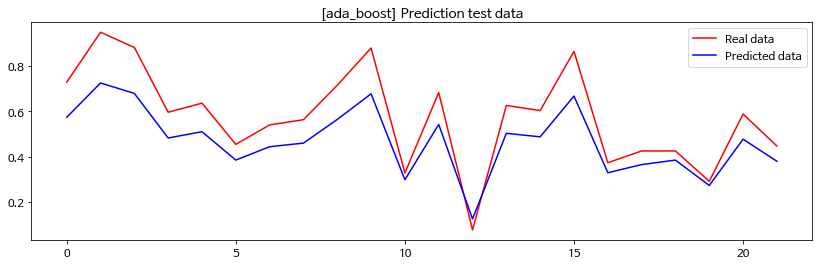

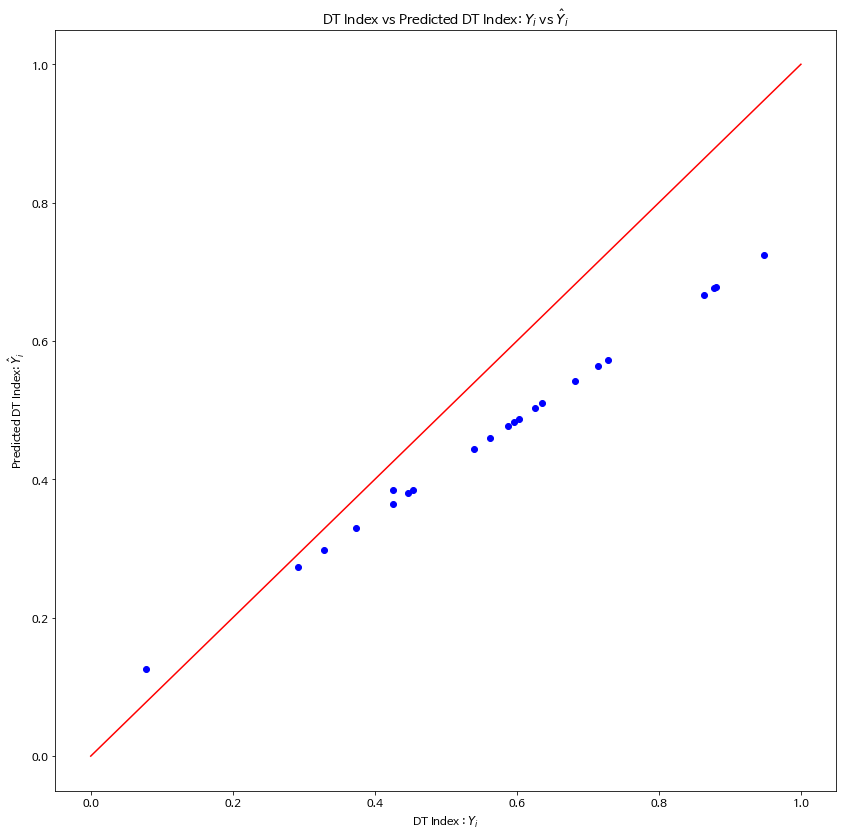

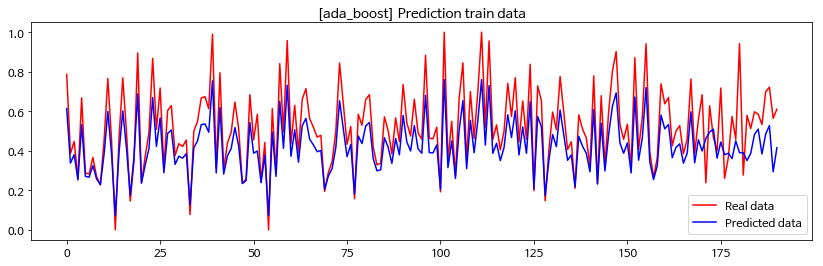

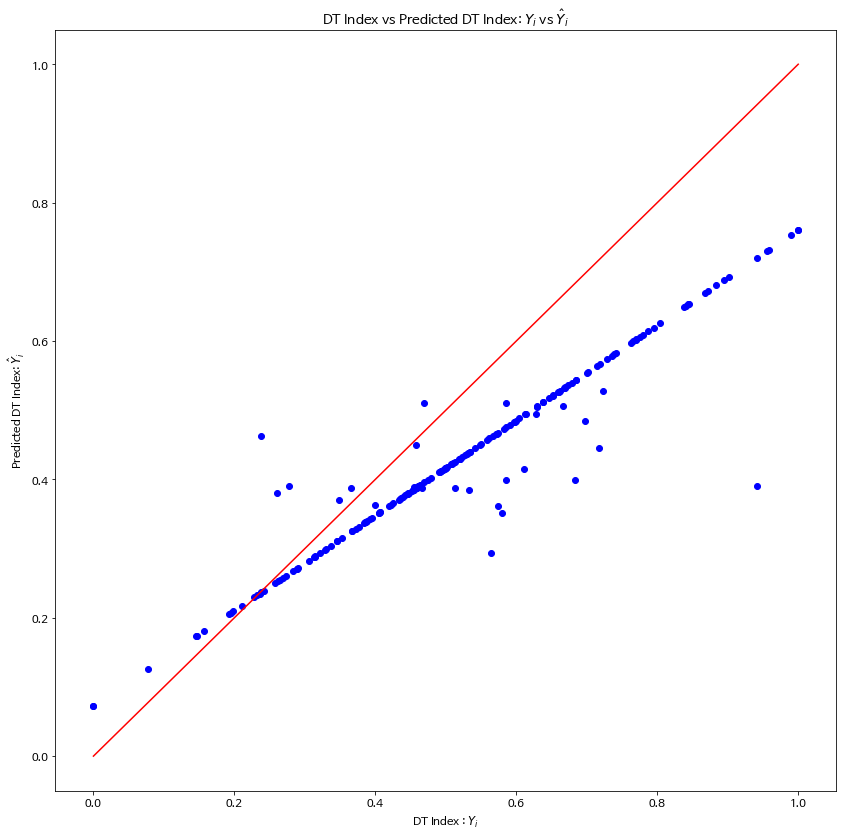

In [422]:
visualize_result(y_test.values, ada_boost_basic.predict(x_test), 'test data', '[ada_boost]')
visualize_result(y_train.values, ada_boost_basic.predict(x_train), 'train data', '[ada_boost]')

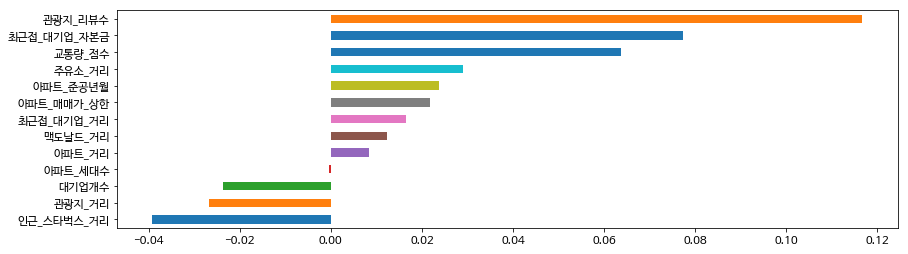

In [332]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,ada_boost_basic))

### randomForest ensemble

In [474]:
ada_boost_regressor = ensemble.AdaBoostRegressor(RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=0))
ada_boost_regressor.fit(x_train, y_train)
print(ada_boost_regressor.score(x_train, y_train))
print(ada_boost_regressor.score(x_test, y_test))

0.9293989480048631
-0.03822432930741204


In [476]:
kfold3.cross_val('adaboost_forest', ada_boost_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=3, task='regression')
kfold5.cross_val('adaboost_forest', ada_boost_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=5, task='regression')
kfold10.cross_val('adaboost_forest', ada_boost_regressor, df=df, train_features=feature_names, label_feature='score_A2', k=10, task='regression')

학습 평균 score = 0.92938029, 검증 평균 score = 0.06370623
*************** score_A2 complete ***************

학습 평균 score = 0.92955615, 검증 평균 score = 0.04080259
*************** score_A2 complete ***************

학습 평균 score = 0.92962895, 검증 평균 score = 0.00869755
*************** score_A2 complete ***************



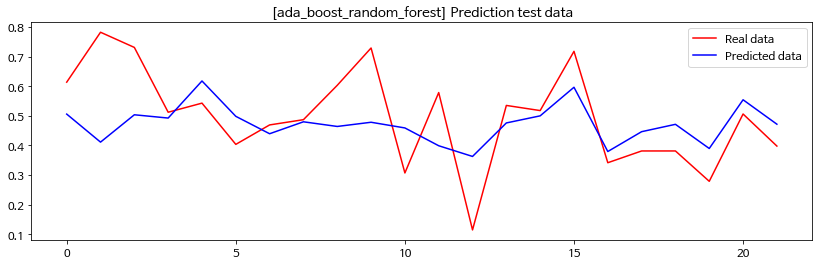

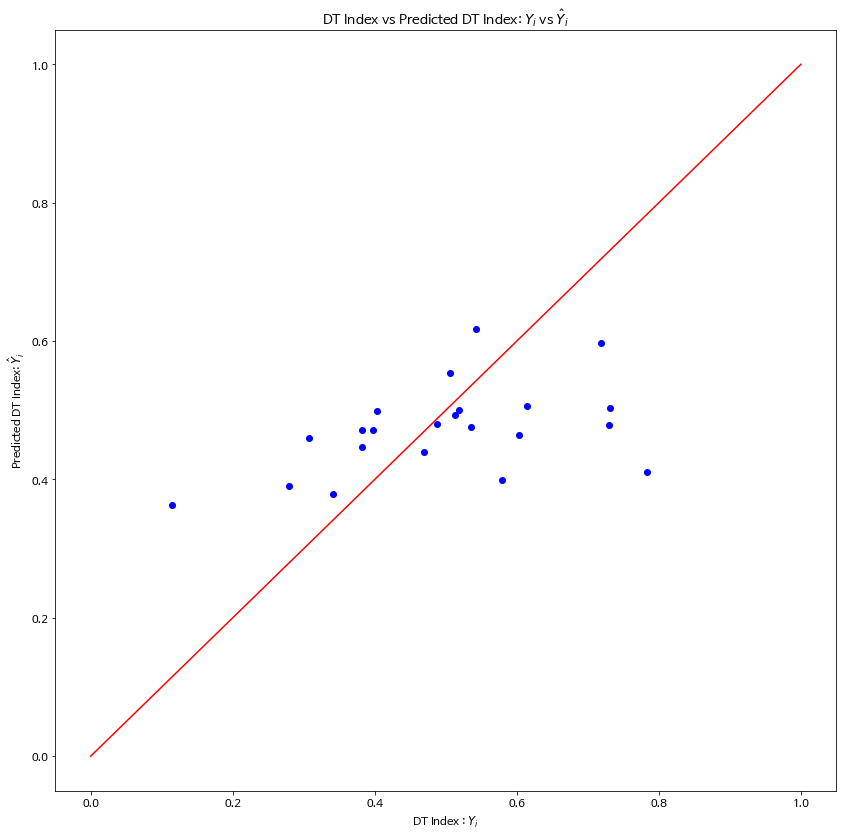

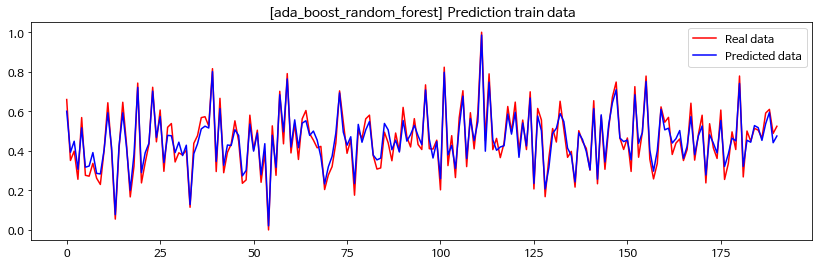

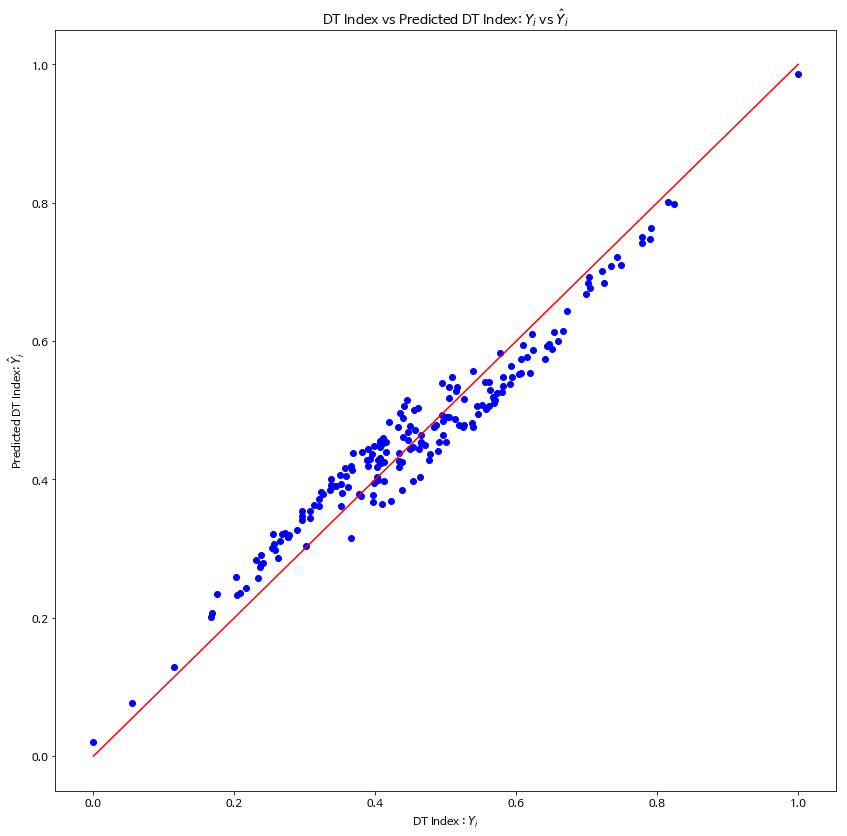

In [330]:
visualize_result(y_test.values, ada_boost_regressor.predict(x_test), 'test data', '[ada_boost_random_forest]')
visualize_result(y_train.values, ada_boost_regressor.predict(x_train), 'train data', '[ada_boost_random_forest]')

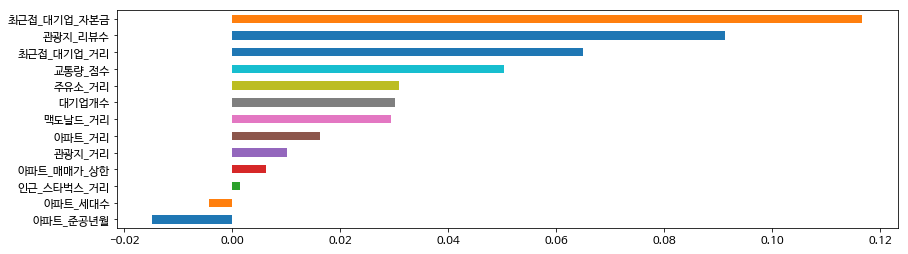

In [333]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,ada_boost_regressor))

## MLP regression

In [349]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, BatchNormalization, LayerNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras.losses import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping

In [418]:
def mlp_kfold_test(model, df, train_features, label_feature, k=5, normalization='minmax'):
    models = []
    histories = []
    train_scores = np.zeros(k)
    test_scores = np.zeros(k)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=50)
    cv = KFold(k, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(cv.split(df)):
        df_train = df.iloc[idx_train]
        df_test = df.iloc[idx_test]
        df_train, df_test = normalization_train_test(df_train, df_test, normalization)
        
        history = model.fit(df_train[train_features], df_train[label_feature], 
                            validation_data = (df_test[train_features], df_test[label_feature]), 
                            epochs=300, batch_size=8, verbose=0, 
                            shuffle=True,
                            callbacks=[early_stop])
        models.append(model)
#         histories.append(history)
        
        def get_score(df_, pred_):
            rss = ((df_[label_feature] - pred_) ** 2).sum()
            tss = ((df_[label_feature] - df_[label_feature].mean())** 2).sum()
            rsquared = 1 - rss / tss
            return rsquared
        train_score = get_score(df_train, model.predict(df_train[train_features]))
        test_score = get_score(df_test, model.predict(df_test[train_features]))

        train_scores[i] = train_score
        test_scores[i] = test_score
        print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(train_score, test_score))
    return train_scores, test_scores, models

In [523]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def BuildModel():
    model = Sequential([
        Dense(300, kernel_initializer='normal', input_shape=(13,), activation = "selu"), 
        BatchNormalization(),
        Dense(300, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(300, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(150, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(150, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
        ])
#     model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=mean_squared_error, optimizer=optimizers.Adam(lr=0.0001), metrics=[coeff_determination, 'mse'])
#     model.summary()
    return model
MLP_regressor = KerasRegressor(build_fn=BuildModel)

In [526]:
early_stop = EarlyStopping(monitor='val_loss', patience=50)
history = MLP_regressor.fit(x_train, y_train, 
                            validation_data = (x_test, y_test), 
                            epochs=100, batch_size=8, verbose=1, 
                            shuffle=True,
                            callbacks=[early_stop])
# BuildModel().summary()

Epoch 1/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0365 - coeff_determination: -0.8115 - mse: 0.0365 - val_loss: 0.0255 - val_coeff_determination: -1.0770 - val_mse: 0.0255
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0299 - coeff_determination: -0.5689 - mse: 0.0299 - val_loss: 0.0255 - val_coeff_determination: -0.6980 - val_mse: 0.0255
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0258 - coeff_determination: -0.4568 - mse: 0.0258 - val_loss: 0.0258 - val_coeff_determination: -0.7448 - val_mse: 0.0258
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0241 - coeff_determination: -0.1596 - mse: 0.0241 - val_loss: 0.0258 - val_coeff_determination: -0.6307 - val_mse: 0.0258
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0242 - coeff_determination: -0.3273 - mse: 0.0242 - val_loss: 0.0262 - val_coeff_determination: -0.5898 - val_mse: 0.0262
Epoch 6/100
24/

In [525]:
histories = []
kfold_train_scores['mlp regressor'], kfold_test_scores['mlp regressor'], kfold_models['mlp regressor'] = mlp_kfold_test(MLP_regressor, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.48282390, 검증 R2 = -0.74748435


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.60069488, 검증 R2 = -0.07877381


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.36283544, 검증 R2 = -0.48109556


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.49110662, 검증 R2 = -0.45179610


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.53263747, 검증 R2 = -0.13272782


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.57476269, 검증 R2 = -0.24497958


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.64915122, 검증 R2 = -0.01995086


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.53393497, 검증 R2 = -0.58399687


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.51233428, 검증 R2 = 0.17589308


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.52637038, 검증 R2 = -0.18094076


In [410]:
split_model_scores['mlp regressor'] = r2_score(y_test, MLP_regressor.predict(x_test))

In [527]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,coeff_determination,mse,val_loss,val_coeff_determination,val_mse,epoch
68,0.014809,0.181454,0.014809,0.035340,-1.673295,0.035340,68
69,0.014023,0.150060,0.014023,0.033694,-1.366236,0.033694,69
70,0.014947,-0.011894,0.014947,0.032667,-1.655724,0.032667,70
71,0.015636,0.075326,0.015636,0.032213,-0.972238,0.032213,71
72,0.015333,0.198249,0.015333,0.033927,-1.406482,0.033927,72


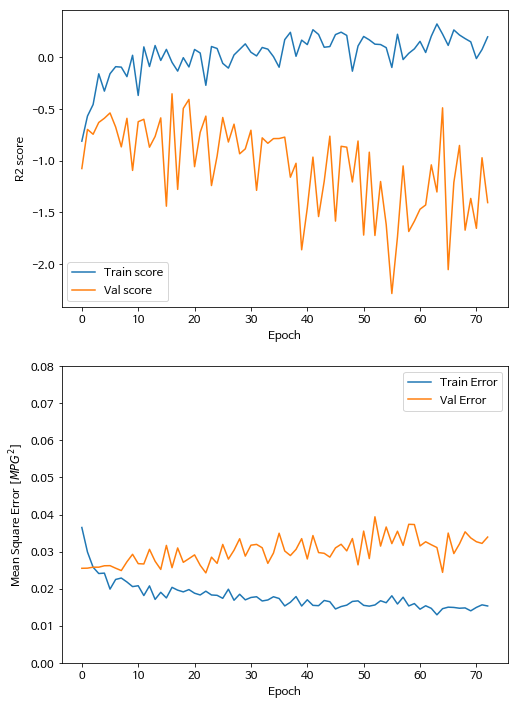

In [532]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.plot(hist['epoch'], hist['coeff_determination'],
           label='Train score')
    plt.plot(hist['epoch'], hist['val_coeff_determination'],
           label = 'Val score')
#     plt.ylim([0,0.2])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,0.08])
    plt.legend()
    plt.show()
    
plot_history(history)

In [533]:
y_train_pred = MLP_regressor.predict(x_train)
y_test_pred = MLP_regressor.predict(x_test)

#check a mean squared error rate
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'mse_train : {mse_train}, mse_test : {mse_test}')

mse_train : 0.010784797370433807, mse_test : 0.03392663598060608


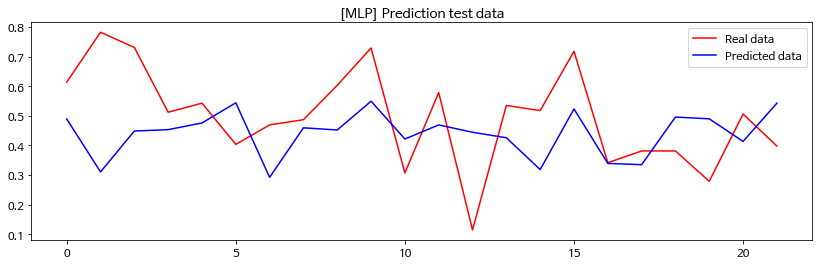

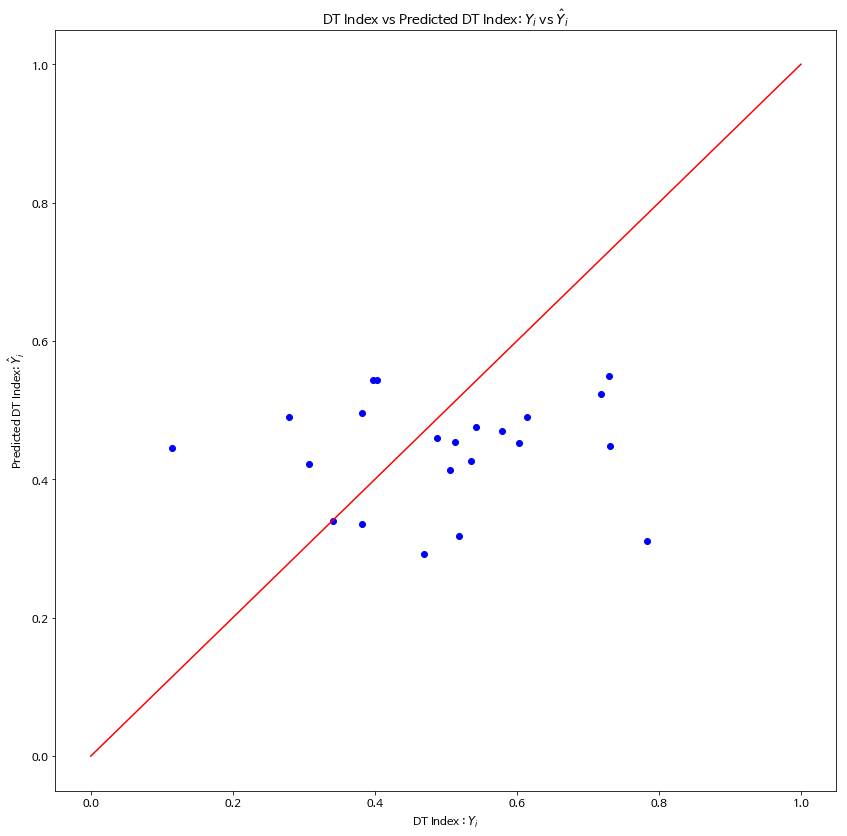

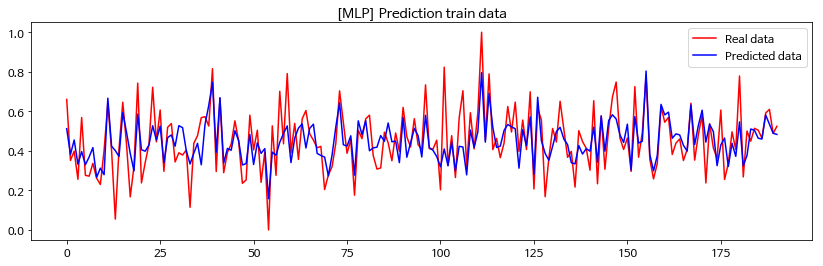

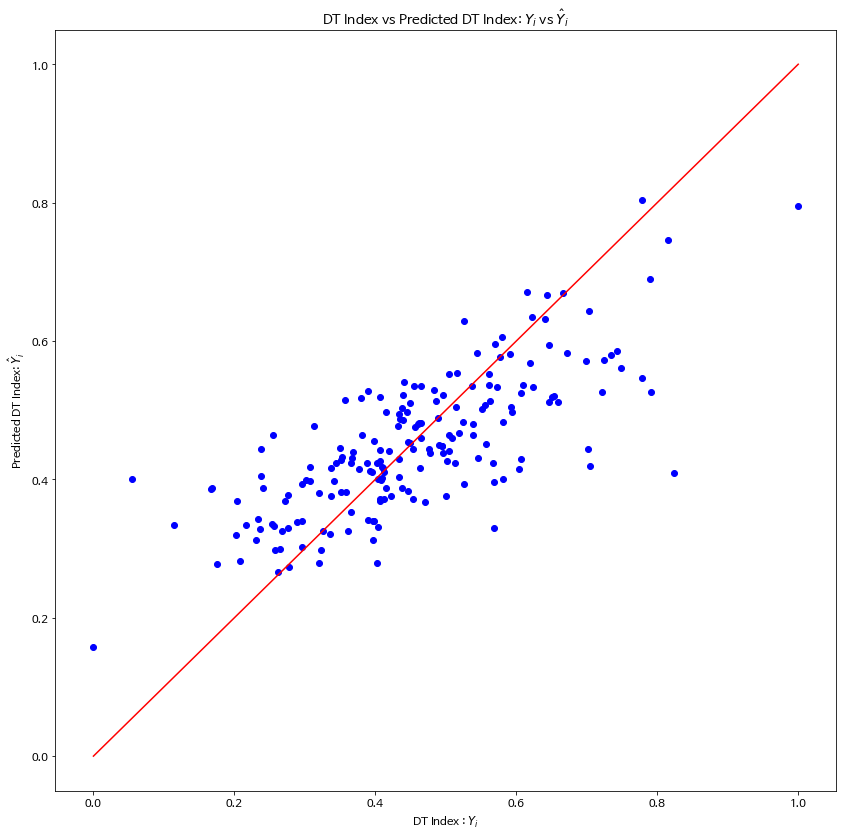

In [534]:
visualize_result(y_test.values, MLP_regressor.predict(x_test), 'test data', '[MLP]')
visualize_result(y_train.values, MLP_regressor.predict(x_train), 'train data', '[MLP]')

In [535]:
split_model_scores['mlp regressor'] = r2_score(y_test, MLP_regressor.predict(x_test))
split_model_mse['mlp regressor'] = mean_squared_error(y_test, MLP_regressor.predict(x_test))
split_model_mae['mlp regressor'] = mean_absolute_error(y_test, MLP_regressor.predict(x_test))

In [536]:
# pipeline_regressor = make_pipeline(MinMaxScaler(), MLP_regressor)
# kfold_model_scores['mlp regressor']=cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mse['mlp regressor'] = cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mae['mlp regressor'] = cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)
print(kfold_model_scores)

{'linear': array([-0.01211954, -0.04617426, -0.02813552, -0.21992824,  0.06382114]), 'decison tree': array([-0.21243217, -0.9233812 , -1.14892678, -0.85505925, -0.93961185])}


In [777]:
kfold_model_scores_DF = pd.DataFrame(kfold_model_scores)

In [778]:
kfold_model_mae

{'linear': array([-0.13456298, -0.11856307, -0.09628876, -0.12224643, -0.09588275]),
 'gradient boosting': array([-0.14819515, -0.15055032, -0.14785487, -0.15378109, -0.11555341])}

In [779]:
kfold_model_scores_DF

,linear,random foreset,gradient boosting
0,-0.012120,NaN,-0.031439
1,-0.046174,NaN,-0.038264
2,-0.028136,NaN,-0.038696
3,-0.219928,NaN,-0.037519
4,0.063821,NaN,-0.025644


In [780]:
kfold_model_scores_DF.mean()

linear              -0.048507
random foreset            NaN
gradient boosting   -0.034312
dtype: float64

In [801]:
s = pd.DataFrame(columns=split_model_scores.keys())
s.loc['mse',:] = split_model_mse
s.loc['mae',:] = split_model_mae
s.loc['scores',:] = split_model_scores
s

,linear,random foreset,gradient boosting,mlp regressor
mse,"tf.Tensor(0.031541400922309254, shape=(), dtyp...","tf.Tensor(0.00704127165286421, shape=(), dtype...","tf.Tensor(0.04015635692780509, shape=(), dtype...","tf.Tensor(0.034646653, shape=(), dtype=float32)"
mae,0.147199,0.0686205,0.146509,0.152128
scores,-0.205296,0.730931,-0.5345,-0.323957


In [591]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto')
svr_rbf.fit(x_train, y_train)
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [541]:
kfold_train_scores['svr_rbf'], kfold_test_scores['svr_rbf'], kfold_models['svr_rbf'] = kfold_test(svr_rbf, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

학습 R2 = 0.36048375, 검증 R2 = -0.61026355
학습 R2 = 0.32641936, 검증 R2 = -0.28772122
학습 R2 = 0.36613766, 검증 R2 = -0.30176557
학습 R2 = 0.38184977, 검증 R2 = -0.56400309
학습 R2 = 0.32410456, 검증 R2 = -1.63858096
학습 R2 = 0.35013117, 검증 R2 = -0.12156406
학습 R2 = 0.33078092, 검증 R2 = -0.93250905
학습 R2 = 0.35911008, 검증 R2 = -0.87989023
학습 R2 = 0.35268062, 검증 R2 = 0.05902066
학습 R2 = 0.35913416, 검증 R2 = -0.43379631


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [542]:
kfold_train_scores['svr_lin'], kfold_test_scores['svr_lin'], kfold_models['svr_lin'] = kfold_test(svr_lin, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.12623128, 검증 R2 = -0.02146839
학습 R2 = 0.10402894, 검증 R2 = -0.06018975
학습 R2 = 0.12269649, 검증 R2 = -0.00996171
학습 R2 = 0.12206704, 검증 R2 = -0.07915773
학습 R2 = 0.11516164, 검증 R2 = -0.20662755
학습 R2 = 0.11020097, 검증 R2 = -0.02437091
학습 R2 = 0.08361317, 검증 R2 = -0.14696991
학습 R2 = 0.14792336, 검증 R2 = -0.31639600
학습 R2 = 0.09324049, 검증 R2 = 0.29832989
학습 R2 = 0.11189280, 검증 R2 = -0.08051212


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [543]:
kfold_train_scores['svr_poly'], kfold_test_scores['svr_poly'], kfold_models['svr_poly'] = kfold_test(svr_poly, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

학습 R2 = 0.35193456, 검증 R2 = -0.65981309
학습 R2 = 0.31520142, 검증 R2 = -0.24748295
학습 R2 = 0.35842376, 검증 R2 = -0.29651410
학습 R2 = 0.37212477, 검증 R2 = -0.54032362
학습 R2 = 0.31454421, 검증 R2 = -2.24015928
학습 R2 = 0.34054463, 검증 R2 = -0.11387414
학습 R2 = 0.31743753, 검증 R2 = -485.30985083
학습 R2 = 0.35070982, 검증 R2 = -0.85932867
학습 R2 = 0.34095571, 검증 R2 = -0.18312861
학습 R2 = 0.34987513, 검증 R2 = -0.41677875


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

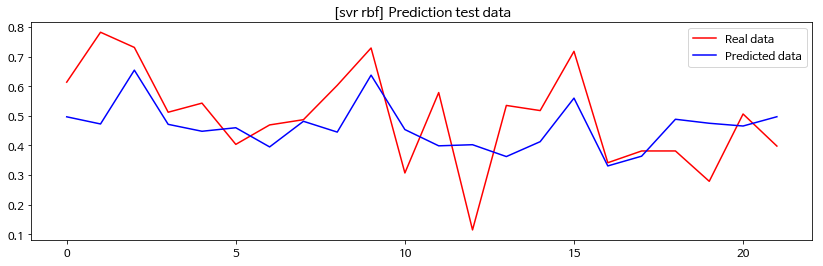

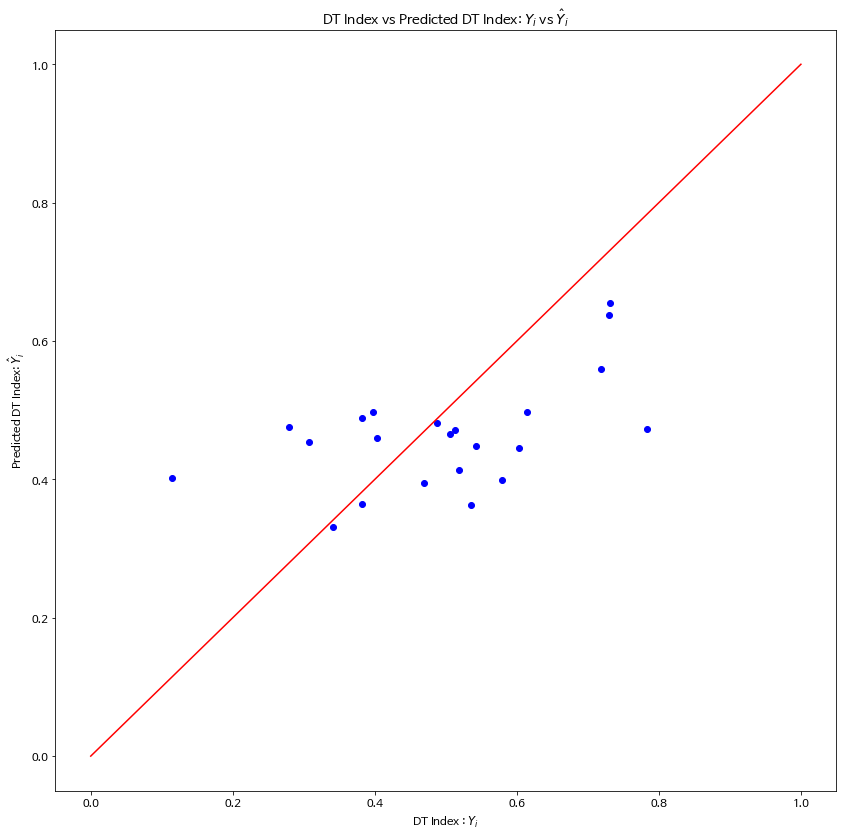

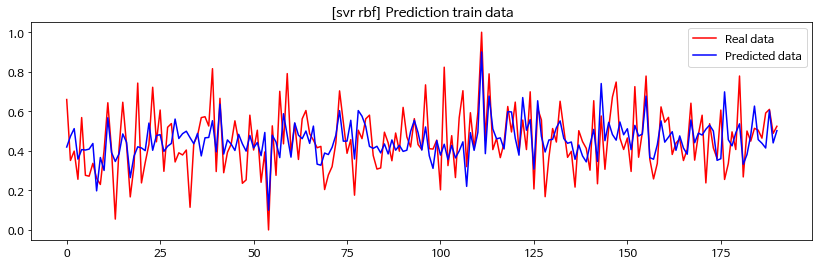

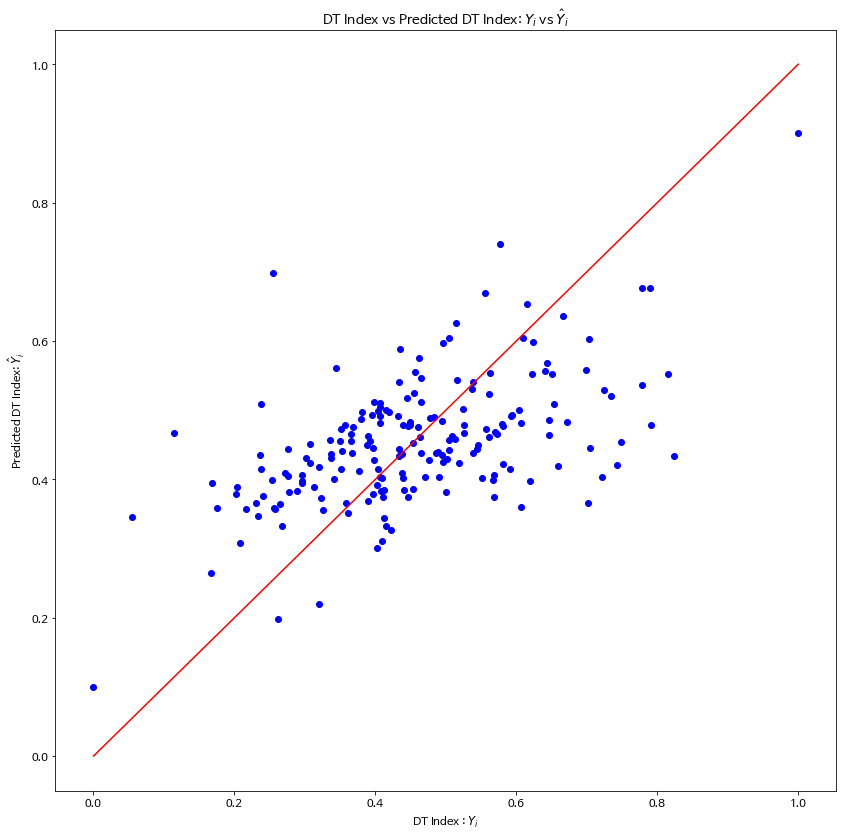

In [544]:
visualize_result(y_test.values, svr_rbf.predict(x_test), 'test data', '[svr rbf]')
visualize_result(y_train.values, svr_rbf.predict(x_train), 'train data', '[svr rbf]')

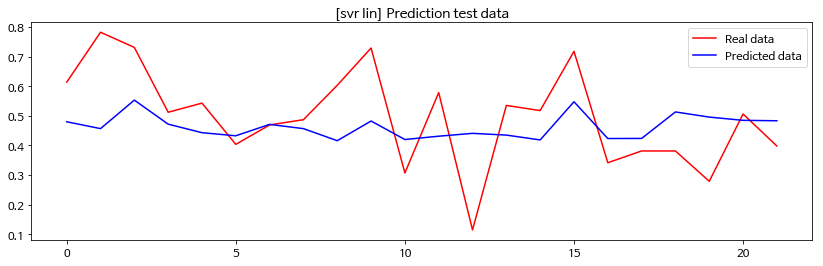

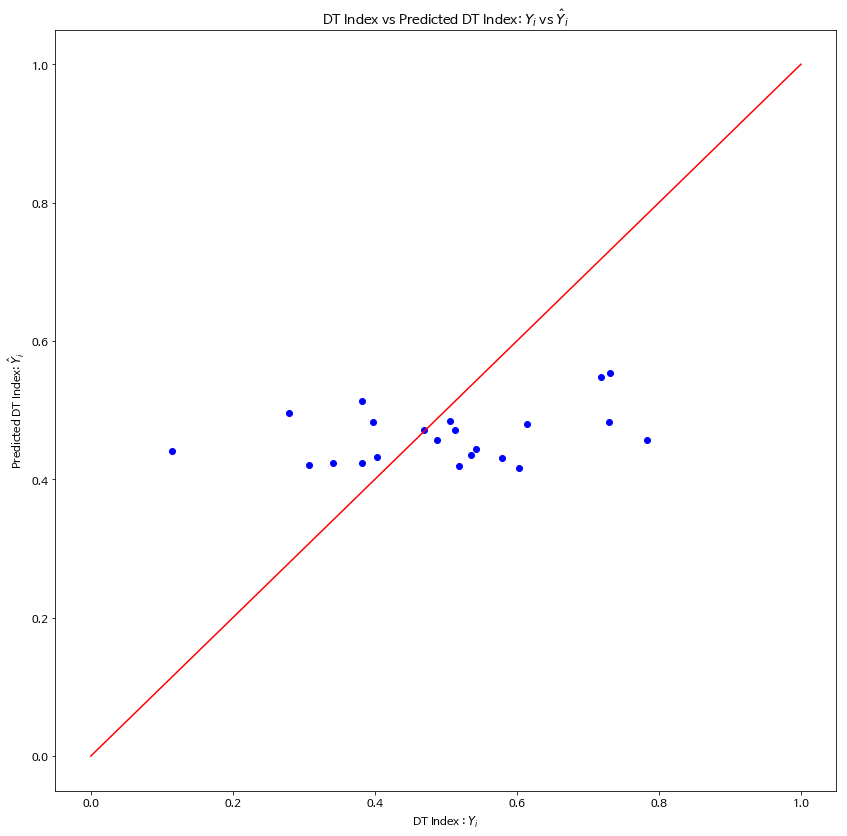

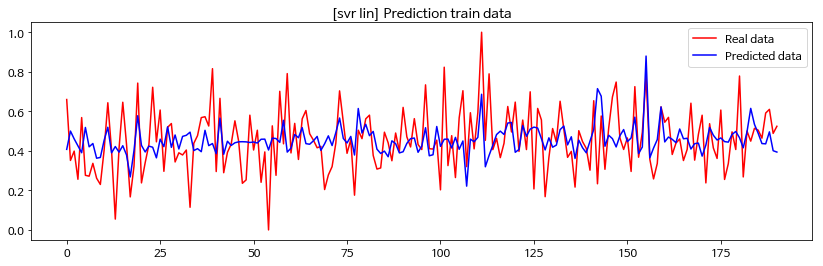

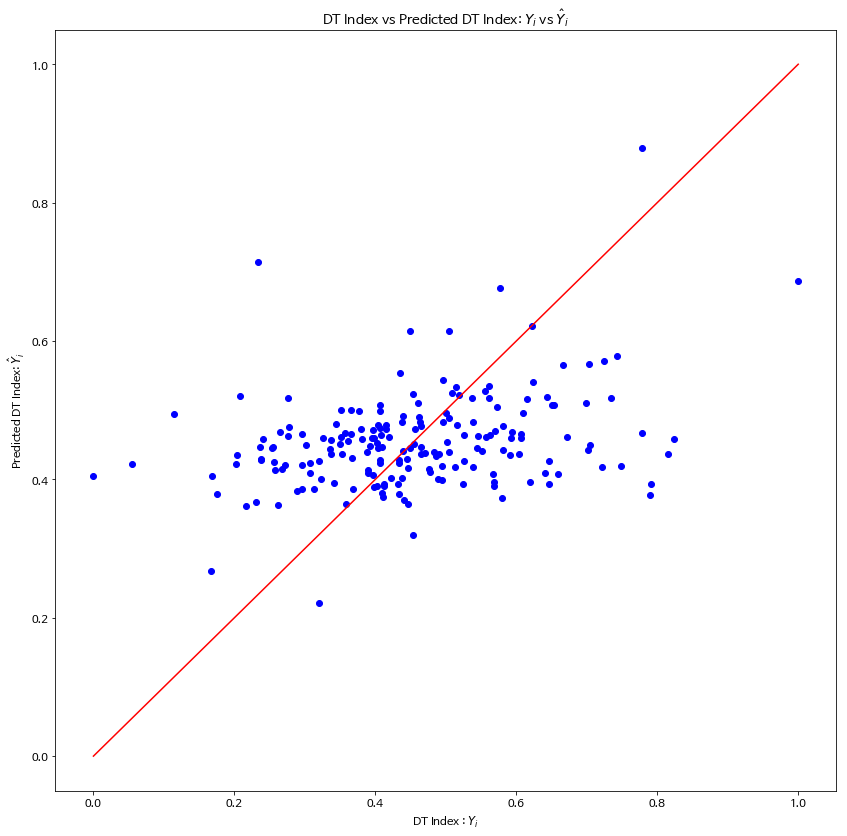

In [545]:
visualize_result(y_test.values, svr_lin.predict(x_test), 'test data', '[svr lin]')
visualize_result(y_train.values, svr_lin.predict(x_train), 'train data', '[svr lin]')

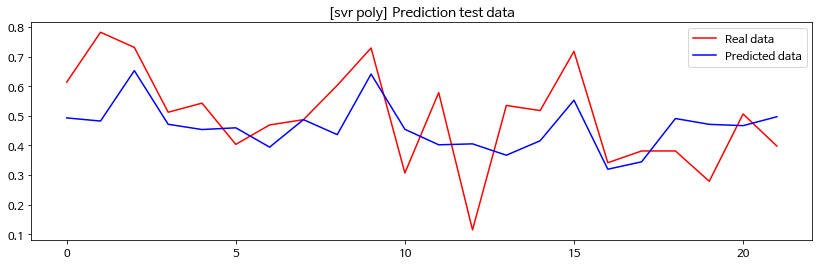

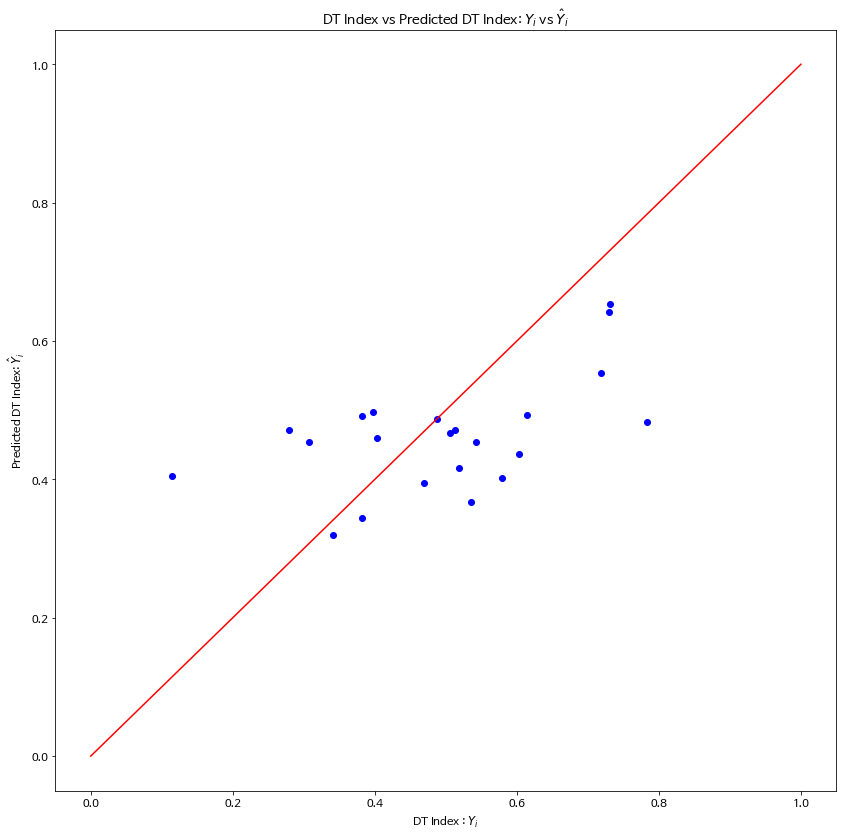

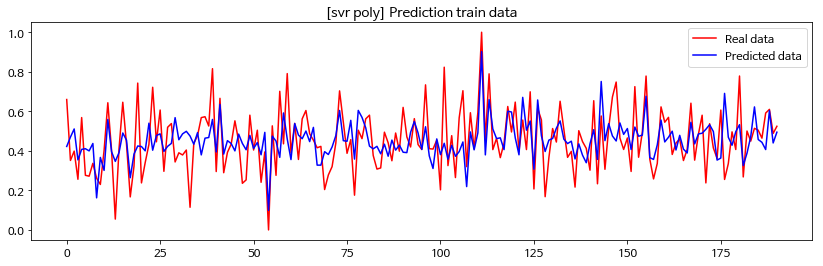

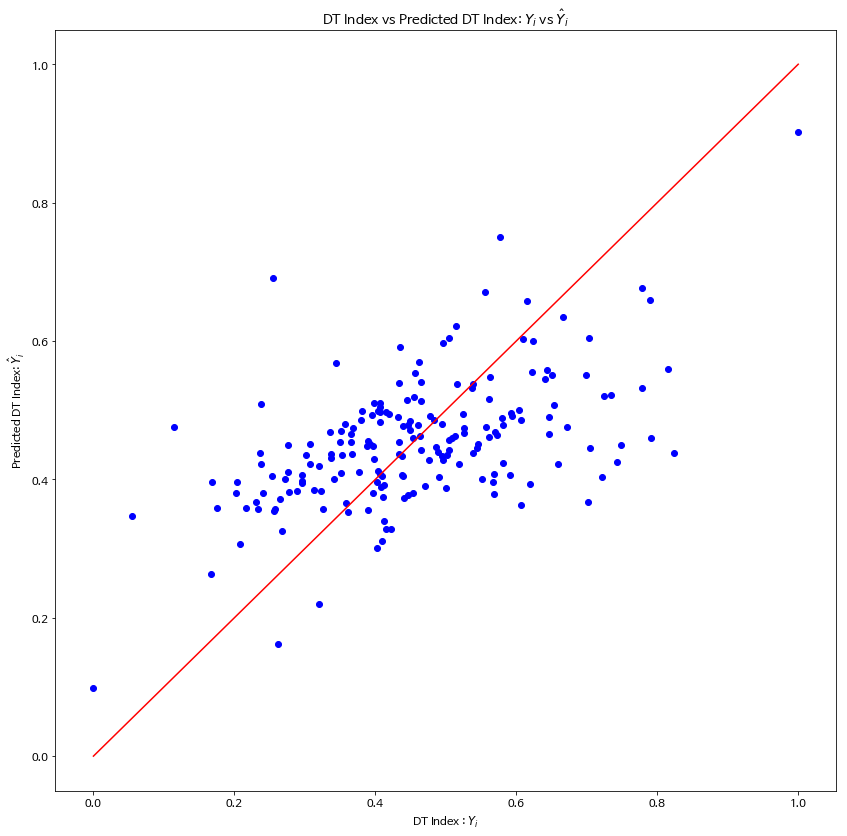

In [546]:
visualize_result(y_test.values, svr_poly.predict(x_test), 'test data', '[svr poly]')
visualize_result(y_train.values, svr_poly.predict(x_train), 'train data', '[svr poly]')

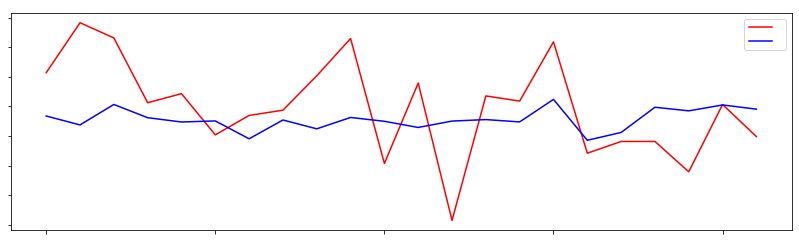

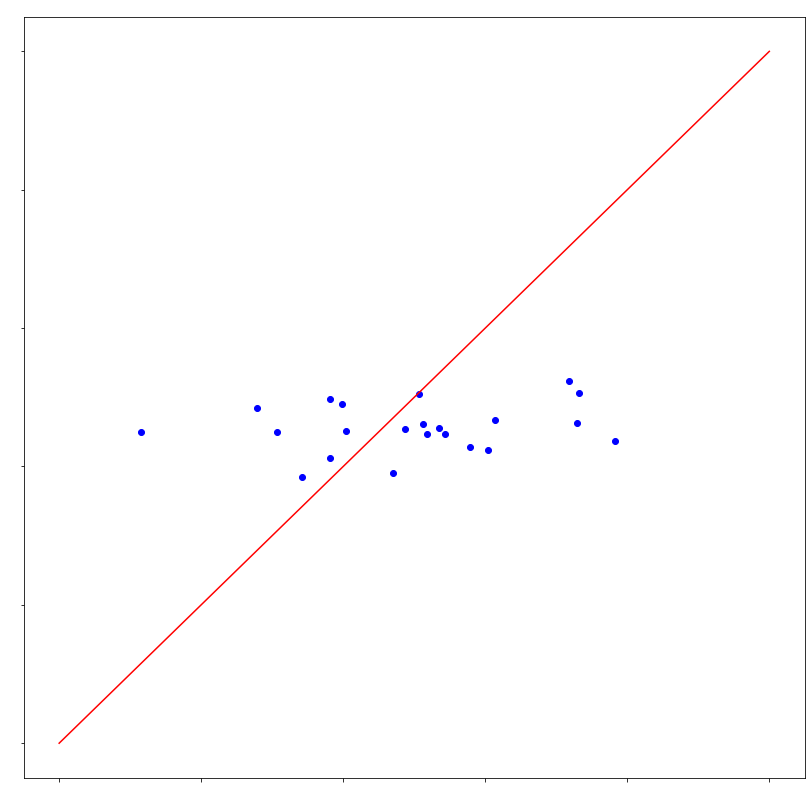

In [813]:
visualize_result(y_test.values, svr_lin.predict(x_test), 'test data', '[svr lin]')

In [579]:
model_name_list = list(kfold_model_df.columns)
model_list = [linear_model, decison_tree_regressor, forest_model, gradient_boosting_regressor, ada_boost_basic, ada_boost_regressor, MLP_regressor, svr_rbf, svr_lin, svr_poly]

for name_, model_ in zip(model_name_list, model_list):
    kfold_test_to_dicts(name_, model_, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.16200114, 검증 R2 = -0.20529575
학습 R2 = 0.12605369, 검증 R2 = -0.01932604
학습 R2 = 0.15510716, 검증 R2 = -0.02965392
학습 R2 = 0.16015026, 검증 R2 = -0.08787829
학습 R2 = 0.14687832, 검증 R2 = -0.31079915
학습 R2 = 0.15052211, 검증 R2 = -0.01020577
학습 R2 = 0.10962504, 검증 R2 = -0.00373921
학습 R2 = 0.16936261, 검증 R2 = -0.24007125
학습 R2 = 0.12664988, 검증 R2 = 0.18386106
학습 R2 = 0.14720875, 검증 R2 = -0.01490795
학습 R2 = 0.95302558, 검증 R2 = -0.34811585
학습 R2 = 0.97848849, 검증 R2 = -0.52614476
학습 R2 = 0.89821907, 검증 R2 = -0.68290071
학습 R2 = 0.97643831, 검증 R2 = -1.65929620
학습 R2 = 0.89245700, 검증 R2 = -1.42948289
학습 R2 = 0.96077884, 검증 R2 = -0.79783194
학습 R2 = 0.97243713, 검증 R2 = -0.36969652


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.94187619, 검증 R2 = -1.71360473
학습 R2 = 0.89131209, 검증 R2 = -0.80950973
학습 R2 = 0.88193829, 검증 R2 = -1.95378006
학습 R2 = 0.87262874, 검증 R2 = 0.12369371


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86134851, 검증 R2 = 0.03487706


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86341874, 검증 R2 = 0.22655743


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87596752, 검증 R2 = -0.21755002


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87492138, 검증 R2 = 0.09300292


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86401830, 검증 R2 = 0.12103602


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86351558, 검증 R2 = -0.16950629


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.88526627, 검증 R2 = -0.15351750


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86323944, 검증 R2 = 0.23546634


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.85700103, 검증 R2 = -0.19001054
학습 R2 = 0.97091013, 검증 R2 = 0.02376342
학습 R2 = 0.96722211, 검증 R2 = 0.04879728
학습 R2 = 0.98108349, 검증 R2 = -0.47855193
학습 R2 = 0.96876582, 검증 R2 = -1.43670018
학습 R2 = 0.98281862, 검증 R2 = -1.85577880
학습 R2 = 0.98092756, 검증 R2 = -0.19031483
학습 R2 = 0.98144990, 검증 R2 = -0.85737571
학습 R2 = 0.97658889, 검증 R2 = -1.04105913
학습 R2 = 0.96454314, 검증 R2 = -1.44480976
학습 R2 = 0.98296902, 검증 R2 = -1.68997828


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.99965473, 검증 R2 = 0.01215953
학습 R2 = 0.99986417, 검증 R2 = -0.00646519
학습 R2 = 0.99939656, 검증 R2 = 0.08004047


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99964532, 검증 R2 = -0.07638611
학습 R2 = 0.99996619, 검증 R2 = 0.03647899


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99969050, 검증 R2 = 0.06672752
학습 R2 = 0.99943786, 검증 R2 = -0.26004448


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99908564, 검증 R2 = -0.08683308
학습 R2 = 0.99998776, 검증 R2 = 0.18272087


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99995258, 검증 R2 = -0.21981114


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93280288, 검증 R2 = 0.16235059


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93022550, 검증 R2 = 0.09053722


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93775311, 검증 R2 = 0.09529990


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93477335, 검증 R2 = -0.20168644


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93616028, 검증 R2 = 0.09400293


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93522638, 검증 R2 = 0.16280416


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93526436, 검증 R2 = -0.05849798


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93105099, 검증 R2 = -0.01668013


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93490530, 검증 R2 = 0.09963274


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93203507, 검증 R2 = 0.08071244


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0321 - coeff_determination: -0.3141 - mse: 0.0321
학습 R2 = -0.07300464, 검증 R2 = 0.00656677


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0317 - coeff_determination: -0.3695 - mse: 0.0317
학습 R2 = -0.06380901, 검증 R2 = -0.50076390


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0370 - coeff_determination: -0.5946 - mse: 0.0370
학습 R2 = -0.03143419, 검증 R2 = -0.01895609


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0424 - coeff_determination: -0.7508 - mse: 0.0424
학습 R2 = -0.08765948, 검증 R2 = -0.19409258


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0385 - coeff_determination: -0.5746 - mse: 0.0385
학습 R2 = -0.08487962, 검증 R2 = -0.49589098


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0351 - coeff_determination: -0.4727 - mse: 0.0351
학습 R2 = -0.03002739, 검증 R2 = 0.00016345


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0513 - coeff_determination: -0.5251 - mse: 0.0513
학습 R2 = -0.05380465, 검증 R2 = -0.41862518


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0468 - coeff_determination: -0.8700 - mse: 0.0468
학습 R2 = -0.05107592, 검증 R2 = -0.09465957


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0342 - coeff_determination: -0.3640 - mse: 0.0342
학습 R2 = -0.08347031, 검증 R2 = -0.05159244


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0362 - coeff_determination: -0.4322 - mse: 0.0362
학습 R2 = -0.03359469, 검증 R2 = -0.02317369
학습 R2 = 0.36048375, 검증 R2 = -0.61026355
학습 R2 = 0.32641936, 검증 R2 = -0.28772122
학습 R2 = 0.36613766, 검증 R2 = -0.30176557
학습 R2 = 0.38184977, 검증 R2 = -0.56400309
학습 R2 = 0.32410456, 검증 R2 = -1.63858096
학습 R2 = 0.35013117, 검증 R2 = -0.12156406
학습 R2 = 0.33078092, 검증 R2 = -0.93250905
학습 R2 = 0.35911008, 검증 R2 = -0.87989023
학습 R2 = 0.35268062, 검증 R2 = 0.05902066
학습 R2 = 0.35913416, 검증 R2 = -0.43379631
학습 R2 = 0.12623128, 검증 R2 = -0.02146839
학습 R2 = 0.10402894, 검증 R2 = -0.06018975


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.12269649, 검증 R2 = -0.00996171
학습 R2 = 0.12206704, 검증 R2 = -0.07915773
학습 R2 = 0.11516164, 검증 R2 = -0.20662755
학습 R2 = 0.11020097, 검증 R2 = -0.02437091
학습 R2 = 0.08361317, 검증 R2 = -0.14696991
학습 R2 = 0.14792336, 검증 R2 = -0.31639600
학습 R2 = 0.09324049, 검증 R2 = 0.29832989
학습 R2 = 0.11189280, 검증 R2 = -0.08051212


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.35193456, 검증 R2 = -0.65981309
학습 R2 = 0.31520142, 검증 R2 = -0.24748295
학습 R2 = 0.35842376, 검증 R2 = -0.29651410
학습 R2 = 0.37212477, 검증 R2 = -0.54032362
학습 R2 = 0.31454421, 검증 R2 = -2.24015928
학습 R2 = 0.34054463, 검증 R2 = -0.11387414
학습 R2 = 0.31743753, 검증 R2 = -485.30985083
학습 R2 = 0.35070982, 검증 R2 = -0.85932867
학습 R2 = 0.34095571, 검증 R2 = -0.18312861
학습 R2 = 0.34987513, 검증 R2 = -0.41677875


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [592]:
kfold_test_to_dicts('svr_poly', svr_poly, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

학습 R2 = 0.15672945, 검증 R2 = -0.25696939
학습 R2 = 0.12803347, 검증 R2 = -0.13675449
학습 R2 = 0.14636140, 검증 R2 = -0.00151552
학습 R2 = 0.13597980, 검증 R2 = -0.02085697
학습 R2 = 0.15610044, 검증 R2 = -0.18028583
학습 R2 = 0.14342500, 검증 R2 = 0.00096721
학습 R2 = 0.18377970, 검증 R2 = -3.60457694
학습 R2 = 0.16010766, 검증 R2 = -0.26029087
학습 R2 = 0.12663205, 검증 R2 = -0.67133087
학습 R2 = 0.13702433, 검증 R2 = 0.00399700


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [593]:
kfold_test_mse_df = pd.DataFrame(kfold_test_mse)

In [607]:
kfold_test_mse_df.mean()

linear                     0.027009
decison tree               0.049351
random foreset             0.025602
gradient boosting          0.046038
adaboost decison tree      0.026479
random foreset ensemble    0.024509
mlp regressor              0.030359
svr_rbf                    0.039870
svr_lin                    0.027133
svr_poly                   0.044080
dtype: float64

In [638]:
kfold_test_df = kfold_test_df.reset_index()


In [650]:
kfold_train_df = kfold_train_df.reset_index()

In [651]:
kfold_test_mse_df = kfold_test_mse_df.reset_index()

In [652]:
kfold_train_mse_df = kfold_train_mse_df.reset_index()

In [653]:
kfold_test_df_melt = kfold_test_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_train_df_melt = kfold_train_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_test_mse_df_melt = kfold_test_mse_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_train_mse_df_melt = kfold_train_mse_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")

In [654]:
plt.rcParams['font.size'] = 14

In [667]:
kfold_test_df

,index,linear,decison tree,random foreset,gradient boosting,adaboost decison tree,random foreset ensemble,mlp regressor,svr_rbf,svr_lin,svr_poly
0,0,-0.205296,-0.348116,0.123694,0.023763,0.012160,0.162351,0.006567,-0.610264,-0.021468,-0.256969
1,1,-0.019326,-0.526145,0.034877,0.048797,-0.006465,0.090537,-0.500764,-0.287721,-0.060190,-0.136754
2,2,-0.029654,-0.682901,0.226557,-0.478552,0.080040,0.095300,-0.018956,-0.301766,-0.009962,-0.001516
3,3,-0.087878,-1.659296,-0.217550,-1.436700,-0.076386,-0.201686,-0.194093,-0.564003,-0.079158,-0.020857
4,4,-0.310799,-1.429483,0.093003,-1.855779,0.036479,0.094003,-0.495891,-1.638581,-0.206628,-0.180286
5,5,-0.010206,-0.797832,0.121036,-0.190315,0.066728,0.162804,0.000163,-0.121564,-0.024371,0.000967
6,6,-0.003739,-0.369697,-0.169506,-0.857376,-0.260044,-0.058498,-0.418625,-0.932509,-0.146970,-3.604577
7,7,-0.240071,-1.713605,-0.153517,-1.041059,-0.086833,-0.016680,-0.094660,-0.879890,-0.316396,-0.260291
8,8,0.183861,-0.809510,0.235466,-1.444810,0.182721,0.099633,-0.051592,0.059021,0.298330,-0.671331
9,9,-0.014908,-1.953780,-0.190011,-1.689978,-0.219811,0.080712,-0.023174,-0.433796,-0.080512,0.003997


In [665]:
kfold_test_df.max()

index                      9.000000
linear                     0.183861
decison tree              -0.348116
random foreset             0.235466
gradient boosting          0.048797
adaboost decison tree      0.182721
random foreset ensemble    0.162804
mlp regressor              0.006567
svr_rbf                    0.059021
svr_lin                    0.298330
svr_poly                   0.003997
dtype: float64

In [666]:
kfold_train_df.max()

index                      9.000000
linear                     0.169363
decison tree               0.978488
random foreset             0.885266
gradient boosting          0.982969
adaboost decison tree      0.999988
random foreset ensemble    0.937753
mlp regressor             -0.030027
svr_rbf                    0.381850
svr_lin                    0.147923
svr_poly                   0.183780
dtype: float64

In [660]:
kfold_test_df.mean()

index                      4.500000
linear                    -0.073802
decison tree              -1.029036
random foreset             0.010405
gradient boosting         -0.892201
adaboost decison tree     -0.027141
random foreset ensemble    0.050848
mlp regressor             -0.179102
svr_rbf                   -0.571107
svr_lin                   -0.064732
svr_poly                  -0.512762
dtype: float64

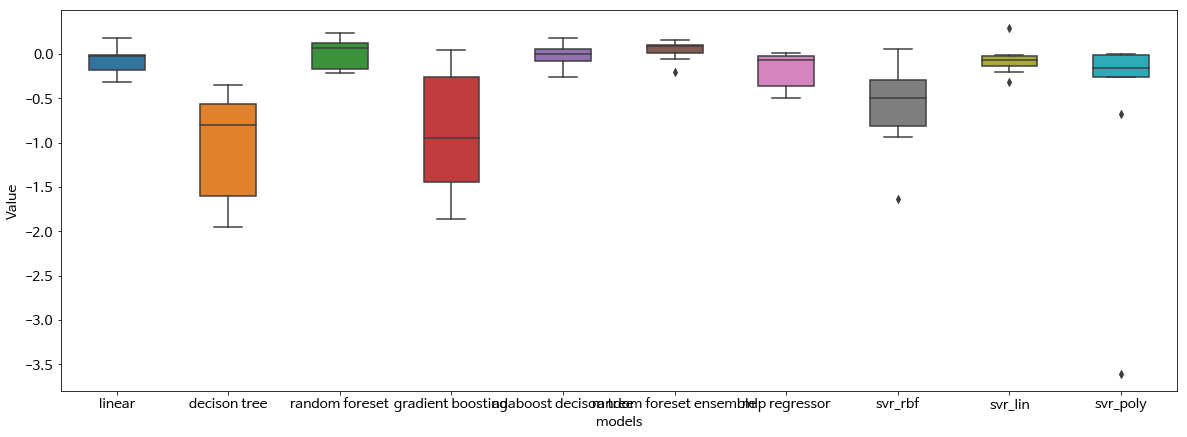

In [655]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_test_df_melt, width=0.5)

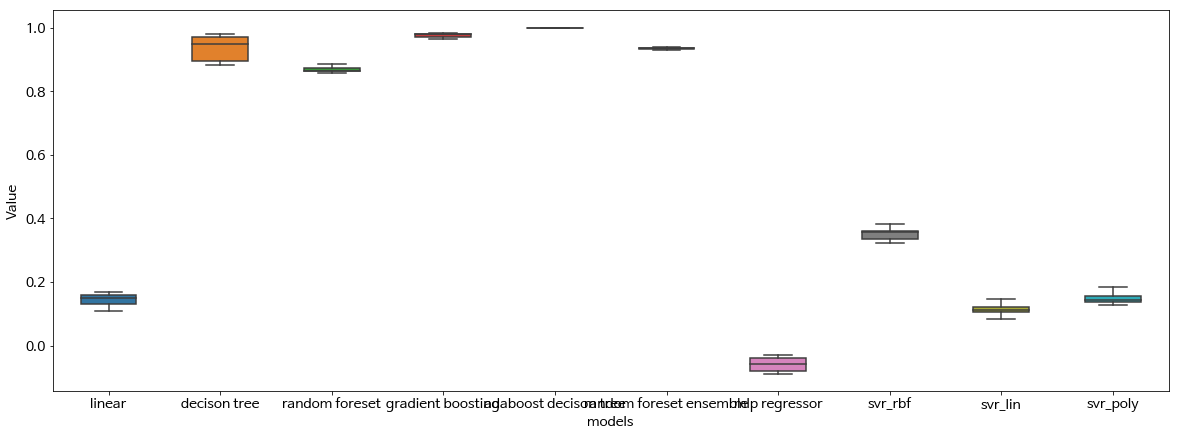

In [656]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_train_df_melt, width=0.5)

In [663]:
kfold_test_mse_df

,index,linear,decison tree,random foreset,gradient boosting,adaboost decison tree,random foreset ensemble,mlp regressor,svr_rbf,svr_lin,svr_poly
0,0,0.031541,0.035279,0.022932,0.025547,0.025851,0.021920,0.025997,0.042139,0.026731,0.032894
1,1,0.029817,0.044642,0.028231,0.027824,0.029440,0.026603,0.043899,0.037668,0.031012,0.033252
2,2,0.024955,0.040788,0.018746,0.035835,0.022297,0.021927,0.024696,0.031551,0.024478,0.024274
3,3,0.036902,0.090206,0.041301,0.082655,0.036512,0.040762,0.040505,0.053053,0.036606,0.034628
4,4,0.020384,0.037781,0.014105,0.044410,0.014984,0.014089,0.023263,0.041033,0.018764,0.018355
5,5,0.022129,0.039382,0.019254,0.026074,0.020444,0.018339,0.021902,0.024568,0.022439,0.021884
6,6,0.043252,0.059021,0.050395,0.080036,0.054296,0.045612,0.061130,0.083274,0.049424,0.198415
7,7,0.029056,0.063583,0.027028,0.047824,0.025466,0.023822,0.025649,0.044048,0.030845,0.029530
8,8,0.015103,0.033486,0.014148,0.045242,0.015124,0.016662,0.019460,0.017413,0.012985,0.030929
9,9,0.016953,0.049341,0.019878,0.044934,0.020376,0.015356,0.017091,0.023950,0.018049,0.016637


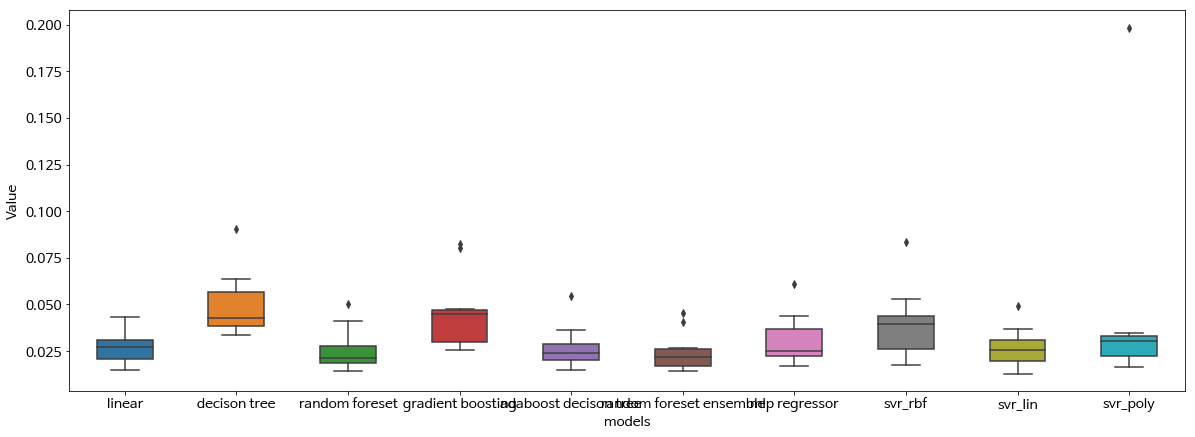

In [657]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_test_mse_df_melt, width=0.5)

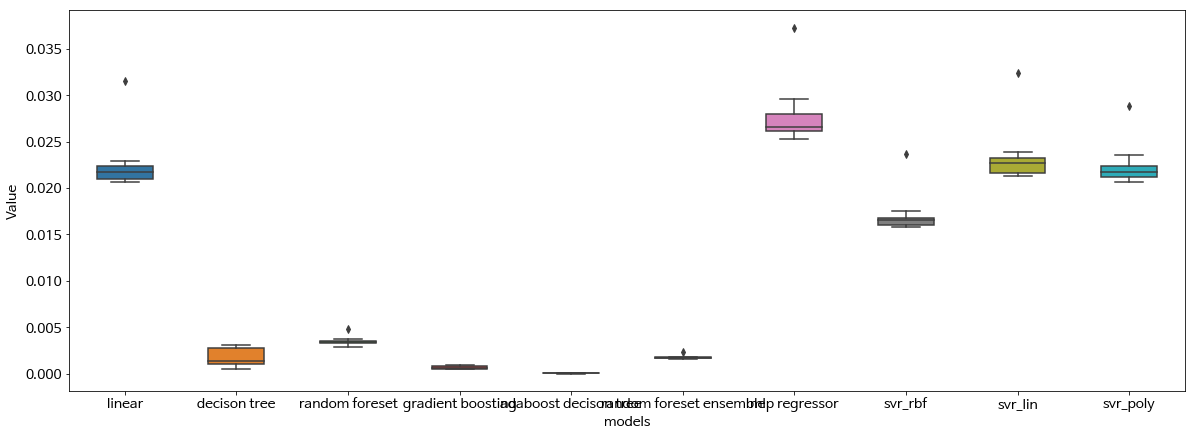

In [658]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_train_mse_df_melt, width=0.5)

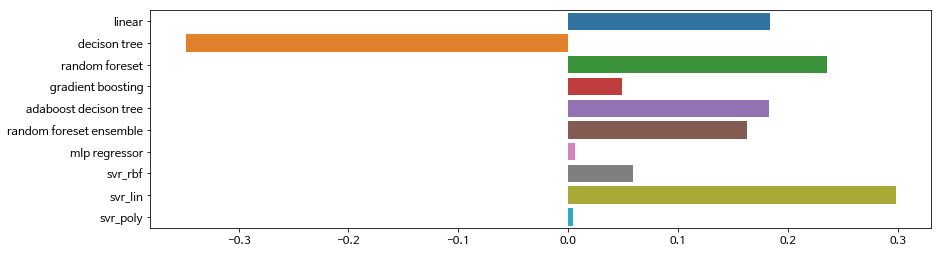

In [625]:
sns.barplot(kfold_test_df.max().values, kfold_test_df.max().index)

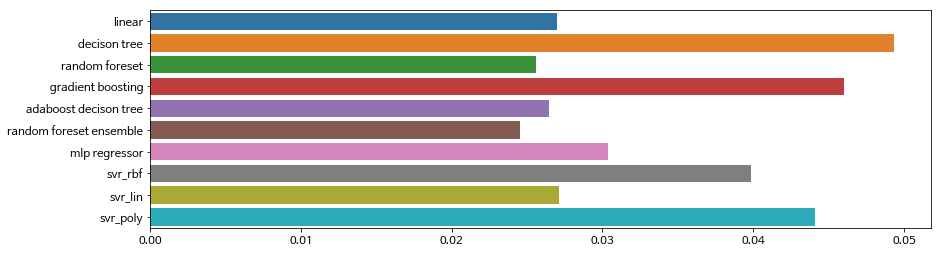

In [623]:
sns.barplot(kfold_test_mse_df.mean().values, kfold_test_mse_df.mean().index)

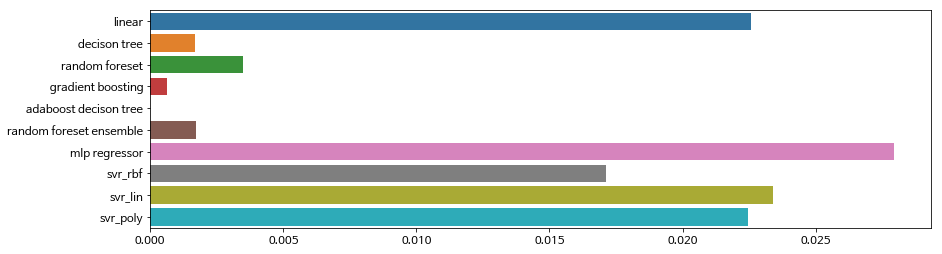

In [622]:
sns.barplot(kfold_train_mse_df.mean().values, kfold_train_mse_df.mean().index)

In [594]:
kfold_test_mse_df.mean()

linear                     0.027009
decison tree               0.049351
random foreset             0.025602
gradient boosting          0.046038
adaboost decison tree      0.026479
random foreset ensemble    0.024509
mlp regressor              0.030359
svr_rbf                    0.039870
svr_lin                    0.027133
svr_poly                   0.044080
dtype: float64

In [598]:
kfold_test_df.mean()

linear                    -0.073802
decison tree              -1.029036
random foreset             0.010405
gradient boosting         -0.892201
adaboost decison tree     -0.027141
random foreset ensemble    0.050848
mlp regressor             -0.179102
svr_rbf                   -0.571107
svr_lin                   -0.064732
svr_poly                  -0.512762
dtype: float64

In [599]:
kfold_train_df.mean()

linear                     0.145356
decison tree               0.934697
random foreset             0.868133
gradient boosting          0.975728
adaboost decison tree      0.999668
random foreset ensemble    0.934020
mlp regressor             -0.059276
svr_rbf                    0.351083
svr_lin                    0.113706
svr_poly                   0.147417
dtype: float64

In [637]:
kfold_test_df = pd.DataFrame(kfold_test_scores)
kfold_train_df = pd.DataFrame(kfold_train_scores)
kfold_model_df = pd.DataFrame(kfold_models)
kfold_test_mse_df = pd.DataFrame(kfold_test_mse)
kfold_train_mse_df = pd.DataFrame(kfold_train_mse)

In [557]:
kfold_test_df.to_excel('kfold_test_df.xlsx', index=False)

In [558]:
kfold_train_df.to_excel('kfold_train_df.xlsx', index=False)

In [490]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


lasso_pipeline = make_pipeline(MinMaxScaler(), LassoCV())

rf_pipeline = make_pipeline(MinMaxScaler(),
                            RandomForestRegressor(random_state=42))

gradient_pipeline = make_pipeline(
    MinMaxScaler(),
    HistGradientBoostingRegressor(random_state=0))

ad_tree_pipeline = make_pipeline(
    MinMaxScaler(),
    ensemble.AdaBoostRegressor(ensemble.AdaBoostRegressor(DecisionTreeRegressor(max_depth=100))))

ad_forest_pipeline = make_pipeline(
    MinMaxScaler(),
    ensemble.AdaBoostRegressor(RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=0)))


estimators = [('Random Forest', rf_pipeline),
              ('Lasso', lasso_pipeline),
              ('Gradient Boosting', gradient_pipeline),
              ('Ada Boost tree',  ad_tree_pipeline),
              ('Ada Boost forest', ad_forest_pipeline)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

In [491]:
X = df[feature_names].copy()
y = df[target_label].copy()

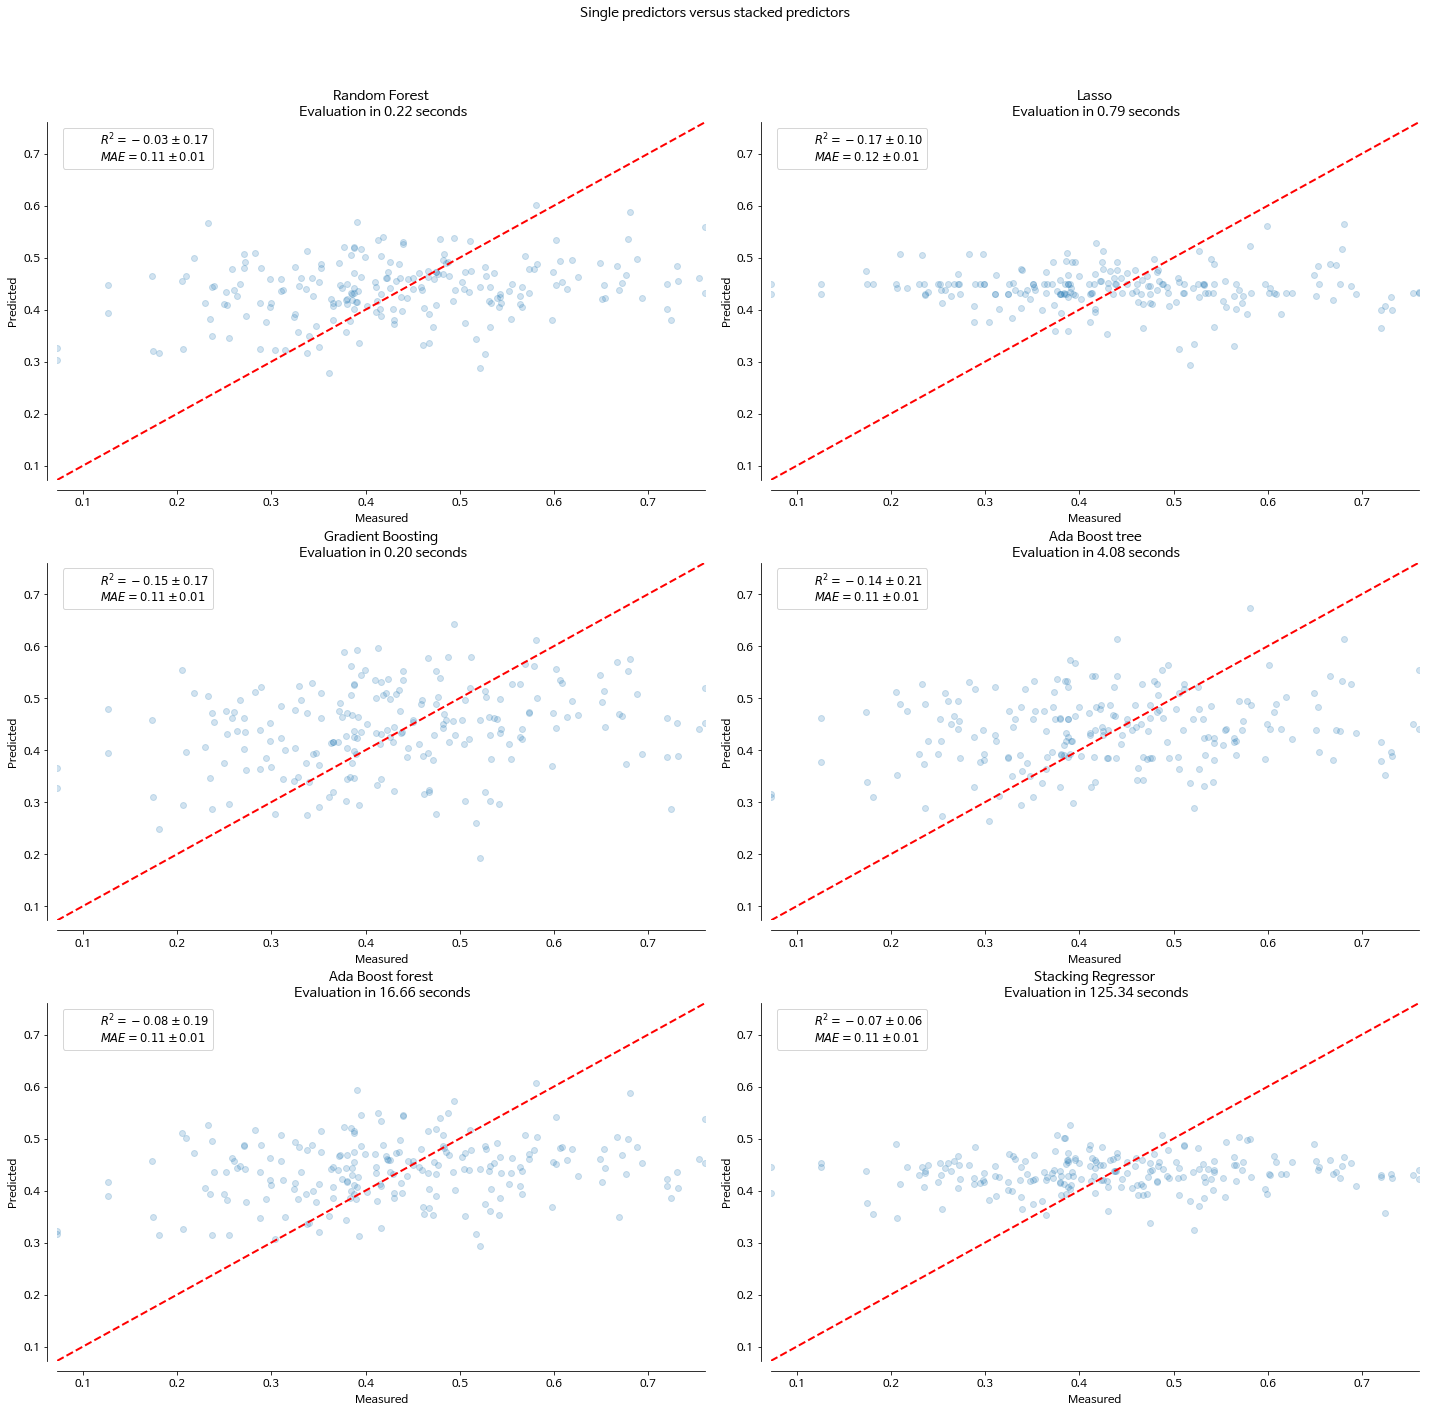

In [492]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(estimator=est, X=X, y=y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()